### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### Step 2: Examine your data 

In [2]:
import sqlite3

sqlite_db = 'airports.sqlite'
conn = sqlite3.connect(sqlite_db)
# conn.text_factory = str
c = conn.cursor()

In [3]:
airports = pd.read_csv('../assets/airports.csv', encoding='utf-8')
cancellations = pd.read_csv('../assets/airport_cancellations.csv', encoding='utf-8')
operations = pd.read_csv('../assets/Airport_operations.csv', encoding='utf-8')

In [4]:
print airports.shape
airports.head()

(5167, 13)


Key LocID                   AP_NAME  \
0  3443.0   STX           HENRY E ROHLSEN   
1  5088.0   X64                  PATILLAS   
2  2886.0   PSE                 MERCEDITA   
3  2879.0   VQS  ANTONIO RIVERA RODRIGUEZ   
4  2883.0   X63                   HUMACAO   

                                 ALIAS Facility Type FAA REGION  \
0        Henry E Rohlsen Int'l Airport       Airport        ASO   
1                                  NaN       Airport        ASO   
2                 Aeropuerto Mercedita       Airport        ASO   
3  Aeropuerto Antonio Rivera Rodr�guez       Airport        ASO   
4       Aeropuerto Regional De Humacao       Airport        ASO   

             COUNTY             CITY STATE     AP Type   Latitude  Longitude  \
0  -VIRGIN ISLANDS-    CHRISTIANSTED    VI  Public Use  17.701556 -64.801722   
1            #NAME?         PATILLAS    PR  Public Use  17.982189 -66.019330   
2            #NAME?            PONCE    PR  Public Use  18.008306 -66.563028   
3            #NAME?  ISLA DE VIEQUES    PR  Public Use  18.134811 -65.493617   
4            #NAME?          HUMACAO    PR  Public Use  18.138017 -65.800718   

  Boundary Data Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                     Yes

In [5]:
airports.isnull().sum()

Key                           3
LocID                        15
AP_NAME                       3
ALIAS                      1669
Facility Type                 3
FAA REGION                    3
COUNTY                        3
CITY                          3
STATE                         3
AP Type                       3
Latitude                      3
Longitude                     3
Boundary Data Available       3
dtype: int64

In [6]:
print cancellations.shape
cancellations.head()

(805, 6)


Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   Departure Diversions  Arrival Diversions  
0                  71.0                46.0  
1                  61.0                33.0  
2                  71.0               124.0  
3                 107.0                45.0  
4                  79.0                42.0

In [7]:
cancellations.isnull().any()

Airport                    False
Year                       False
Departure Cancellations    False
Arrival Cancellations      False
Departure Diversions       False
Arrival Diversions         False
dtype: bool

In [8]:
print operations.shape
operations.head()

(841, 15)


airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  
0                       10.87  
1                       10.24  
2                       11.82  
3                       12.71  
4                       11.48

In [9]:
operations.isnull().any()

airport                               False
year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
dtype: bool

In [10]:
airports.to_sql('airports',
            con=conn,
            if_exists='replace',
            index=False)

/home/nick/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [11]:
operations.to_sql('operations',
            con=conn,
            if_exists='replace',
            index=False)

In [12]:
cancellations.to_sql('cancellations',
            con=conn,
            if_exists='replace',
            index=False)

In [13]:
results = c.execute('SELECT * FROM operations INNER JOIN cancellations ON operations."airport"=cancellations."Airport" AND operations."year"=cancellations."Year" INNER JOIN airports ON operations."airport"=airports."LocID";')
stuff = results.fetchall()

In [14]:
# results = c.execute('SELECT * FROM cancellations LEFT JOIN airports ON cancellations."Airport"=airports."LocID" LEFT JOIN operations ON cancellations."Airport"=operations."airport";')
# stuff = results.fetchall()

In [15]:
results.description

(('airport', None, None, None, None, None, None),
 ('year', None, None, None, None, None, None),
 ('departures for metric computation', None, None, None, None, None, None),
 ('arrivals for metric computation', None, None, None, None, None, None),
 ('percent on-time gate departures', None, None, None, None, None, None),
 ('percent on-time airport departures', None, None, None, None, None, None),
 ('percent on-time gate arrivals', None, None, None, None, None, None),
 ('average_gate_departure_delay', None, None, None, None, None, None),
 ('average_taxi_out_time', None, None, None, None, None, None),
 ('average taxi out delay', None, None, None, None, None, None),
 ('average airport departure delay', None, None, None, None, None, None),
 ('average airborne delay', None, None, None, None, None, None),
 ('average taxi in delay', None, None, None, None, None, None),
 ('average block delay', None, None, None, None, None, None),
 ('average gate arrival delay', None, None, None, None, None, Non

In [16]:
col_names = []

for description in results.description:
    col_names.append(description[0])

In [17]:
col_names = [description[0] for description in results.description]

In [18]:
pd.set_option("display.max_columns", 100)

In [19]:
df = pd.DataFrame(stuff, columns=col_names)
df.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay Airport    Year  Departure Cancellations  \
0                       10.87     ABQ  2004.0                    242.0   
1                       10.24     ABQ  2005.0                    221.0   
2                       11.82     ABQ  2006.0                    392.0   
3                       12.71     ABQ  2007.0                    366.0   
4                       11.48     ABQ  2008.0                    333.0   

   Arrival Cancellations  Departure Diversions  Arrival Diversions     Key  \
0                  235.0                  71.0                46.0  2348.0   
1                  190.0                  61.0                33.0  2348.0   
2                  329.0                  71.0               124.0  2348.0   
3                  304.0                 107.0                45.0  2348.0   
4                  300.0                  79.0                42.0  2348.0   

  LocID                   AP_NAME                      ALIAS Facility Type  \
0   ABQ  ALBUQUERQUE INTL SUNPORT  Albuquerque Int'l Sunport       Airport   
1   ABQ  ALBUQUERQUE INTL SUNPORT  Albuquerque Int'l Sunport       Airport   
2   ABQ  ALBUQUERQUE INTL SUNPORT  Albuquerque Int'l Sunport       Airport   
3   ABQ  ALBUQUERQUE INTL SUNPORT  Albuquerque Int'l Sunport       Airport   
4   ABQ  ALBUQUERQUE INTL SUNPORT  Albuquerque Int'l Sunport       Airport   

  FAA REGION      COUNTY         CITY STATE                 AP Type  \
0        ASW  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial   
1        ASW  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial   
2        ASW  BERNALILLO  ALBUQUERQUE    NM  Federalized/Com

In [20]:
df.shape

(799, 34)

In [21]:
df.isnull().any()

airport                               False
year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
Airport                               False
Year                                  False
Departure Cancellations               False
Arrival Cancellations                 False
Departure Diversions                  False
Arrival Diversions                    False
Key                                   False
LocID                           

In [22]:
# Get rid of duplicate columns
df.drop(['Airport', 'Year', 'LocID'], axis=1, inplace=True)

In [23]:
print df.shape
df.head()

(799, 31)


airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  Departure Cancellations  Arrival Cancellations  \
0                       10.87                    242.0                  235.0   
1                       10.24                    221.0                  190.0   
2                       11.82                    392.0                  329.0   
3                       12.71                    366.0                  304.0   
4                       11.48                    333.0                  300.0   

   Departure Diversions  Arrival Diversions     Key                   AP_NAME  \
0                  71.0                46.0  2348.0  ALBUQUERQUE INTL SUNPORT   
1                  61.0                33.0  2348.0  ALBUQUERQUE INTL SUNPORT   
2                  71.0               124.0  2348.0  ALBUQUERQUE INTL SUNPORT   
3                 107.0                45.0  2348.0  ALBUQUERQUE INTL SUNPORT   
4                  79.0                42.0  2348.0  ALBUQUERQUE INTL SUNPORT   

                       ALIAS Facility Type FAA REGION      COUNTY  \
0  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
1  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
2  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
3  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
4  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   

          CITY STATE                 AP Type   Latitude   Longitude  \
0  ALBUQUERQUE    NM  Federalized/Commercial  35.040194 -106.609194   
1  ALBUQUERQUE    NM  Federalized/Commercial  35.040194 -106.609194   
2  ALBUQUERQUE    NM  Federalized/Commercial  35.04019

In [24]:
# Looking at Chicago airports for fun
df[df['airport'] == 'ORD']

airport  year  departures for metric computation  \
528     ORD  2004                             485187   
529     ORD  2005                             473216   
530     ORD  2006                             466079   
531     ORD  2007                             455562   
532     ORD  2008                             431539   
533     ORD  2009                             404978   
534     ORD  2010                             430948   
535     ORD  2011                             429476   
536     ORD  2012                             427374   
537     ORD  2013                             425352   
538     ORD  2014                             430429   

     arrivals for metric computation  percent on-time gate departures  \
528                           484859                           0.7179   
529                           474168                           0.7242   
530                           467039                           0.7036   
531                           455118                           0.6854   
532                           431421                           0.7049   
533                           404952                           0.7916   
534                           430618                           0.7803   
535                           428779                           0.7605   
536                           427768                           0.7707   
537                           428767                           0.7094   
538                           430750                           0.6787   

     percent on-time airport departures  percent on-time gate arrivals  \
528                              0.5739                         0.7210   
529                              0.6108                         0.7672   
530                              0.5881                         0.7100   
531                              0.5769                         0.6909   
532                              0.6115                         0.7062   
533                              0.7251                         0.8063   
534                              0.7090                         0.7938   
535                              0.6827                         0.7772   
536                              0.6981                         0.8069   
537                              0.6275                         0.7521   
538                              0.5784                         0.7050   

     average_gate_departure_delay  average_taxi_out_time  \
528                         17.79                  20.23   
529                         16.76                  19.03   
530                         19.66                  19.33   
531                         20.81                  19.02   
532                         19.94                  18.67   
533                         13.25                  16.78   
534                         14.09                  16.26   
535                         15.61                  16.55   
536                         14.45                  16.06   
537                         18.64                  16.60   
538                         20.21                  17.50   

     average taxi out delay  average airport departure delay  \
528                    9.36                            25.86   
529                    7.45                            23.14   
530                    7.75                            26.29   
531                    7.63                            27.34   
532                    7.04                            25.98   
533                    5.13                            17.31   
534                    5.05                            18.26   
535                    5.60                            20.20   
536                    4.97                            18.50   
537                    5.46                            23.49   
538                    6.17                            25.88   

     average airborne delay  average taxi in delay  average block delay  \


In [25]:
print np.mean(df['average_gate_departure_delay'])
print np.max(df['average_gate_departure_delay'])
print np.min(df['average_gate_departure_delay'])
print np.mean(df[df['airport'] == 'ORD']['average_gate_departure_delay'])
print np.mean(df[df['airport'] == 'MDW']['average_gate_departure_delay'])

12.8902503129
25.84
5.35
17.3827272727
15.5563636364


In [26]:
df[df['average_gate_departure_delay'] == 5.35]

airport  year  departures for metric computation  \
540     OXR  2005                               2730   

     arrivals for metric computation  percent on-time gate departures  \
540                             2817                           0.8905   

     percent on-time airport departures  percent on-time gate arrivals  \
540                              0.8696                         0.8424   

     average_gate_departure_delay  average_taxi_out_time  \
540                          5.35                   7.95   

     average taxi out delay  average airport departure delay  \
540                    2.11                             6.44   

     average airborne delay  average taxi in delay  average block delay  \
540                    1.58                   0.41                 2.11   

     average gate arrival delay  Departure Cancellations  \
540                        7.86                     33.0   

     Arrival Cancellations  Departure Diversions  Arrival Diversions    Key  \
540                   22.0                   0.0                 0.0  617.0   

    AP_NAME           ALIAS Facility Type FAA REGION   COUNTY    CITY STATE  \
540  OXNARD  Oxnard Airport       Airport        AWP  VENTURA  OXNARD    CA   

        AP Type   Latitude   Longitude Boundary Data Available  
540  Public Use  34.200806 -119.207222                     Yes

In [27]:
df[df['average_gate_departure_delay'] == 25.84]

airport  year  departures for metric computation  \
267     HPN  2007                              35911   

     arrivals for metric computation  percent on-time gate departures  \
267                            36118                           0.5299   

     percent on-time airport departures  percent on-time gate arrivals  \
267                              0.4612                         0.5136   

     average_gate_departure_delay  average_taxi_out_time  \
267                         25.84                  16.01   

     average taxi out delay  average airport departure delay  \
267                    5.23                            30.62   

     average airborne delay  average taxi in delay  average block delay  \
267                    4.67                   3.07                 6.97   

     average gate arrival delay  Departure Cancellations  \
267                       27.16                    600.0   

     Arrival Cancellations  Departure Diversions  Arrival Diversions     Key  \
267                  522.0                  49.0                97.0  2502.0   

                AP_NAME                       ALIAS Facility Type FAA REGION  \
267  WESTCHESTER COUNTY  Westchester County Airport       Airport        AEA   

          COUNTY          CITY STATE                 AP Type   Latitude  \
267  WESTCHESTER  WHITE PLAINS    NY  Federalized/Commercial  41.066944   

     Longitude Boundary Data Available  
267 -73.707556                     Yes

In [28]:
df[df['airport'] == 'MDW']

airport  year  departures for metric computation  \
407     MDW  2004                             136546   
408     MDW  2005                             112579   
409     MDW  2006                             117357   
410     MDW  2007                             120640   
411     MDW  2008                             106786   
412     MDW  2009                              98079   
413     MDW  2010                              96524   
414     MDW  2011                             100892   
415     MDW  2012                             101517   
416     MDW  2013                             101769   
417     MDW  2014                             102373   

     arrivals for metric computation  percent on-time gate departures  \
407                           135948                           0.7622   
408                           111764                           0.7360   
409                           116732                           0.6915   
410                           120302                           0.6962   
411                           106657                           0.7314   
412                            98051                           0.7383   
413                            96752                           0.6838   
414                           101105                           0.7121   
415                           101590                           0.7349   
416                           102887                           0.6555   
417                           102609                           0.6580   

     percent on-time airport departures  percent on-time gate arrivals  \
407                              0.6929                         0.7793   
408                              0.7014                         0.7829   
409                              0.6492                         0.7464   
410                              0.6426                         0.7460   
411                              0.6848                         0.7685   
412                              0.6853                         0.8051   
413                              0.6258                         0.7759   
414                              0.6652                         0.7941   
415                              0.6928                         0.8093   
416                              0.5867                         0.7417   
417                              0.5825                         0.7283   

     average_gate_departure_delay  average_taxi_out_time  \
407                         12.15                  14.68   
408                         13.25                  12.51   
409                         16.63                  11.99   
410                         17.31                  11.68   
411                         15.70                  11.24   
412                         13.85                  11.42   
413                         16.13                  11.50   
414                         15.48                  11.04   
415                         13.74                  10.54   
416                         17.63                  11.68   
417                         19.25                  12.37   

     average taxi out delay  average airport departure delay  \
407                    4.98                            16.23   
408                    3.47                            15.98   
409                    3.65                            19.65   
410                    3.62                            20.36   
411                    3.35                            18.60   
412                    3.52                            16.78   
413                    3.54                            19.13   
414                    2.99                            17.94   
415                    2.55                            15.80   
416                    3.86                            20.96   
417                    4.25                            23.11   

     average airborne delay  average taxi in delay  average block delay  \


In [29]:
df.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
Key                                   float64
AP_NAME                                object
ALIAS                             

### Intro: Write a problem statement / aim for this project

The goal of this project is to use PCA to reduce the dimensionality of the dataset. I chose enough primary components to include at least 90% of the explained variance. I then plugged the resulting primary components into a tree-based regression model, and used the 'average airport departure delay' as my target variable. My target was chosen somewhat arbitrarily because there was no clear machine-learning goal in the project description.

#### 1.2 What are the risks and assumptions of our data? 

All of the various delay columns are highly correlated, so those columns are probably the primary factors in determing the primary components.

### Part 1: Exploratory Data Analysis

#### 1.1 Plot and Describe the Data

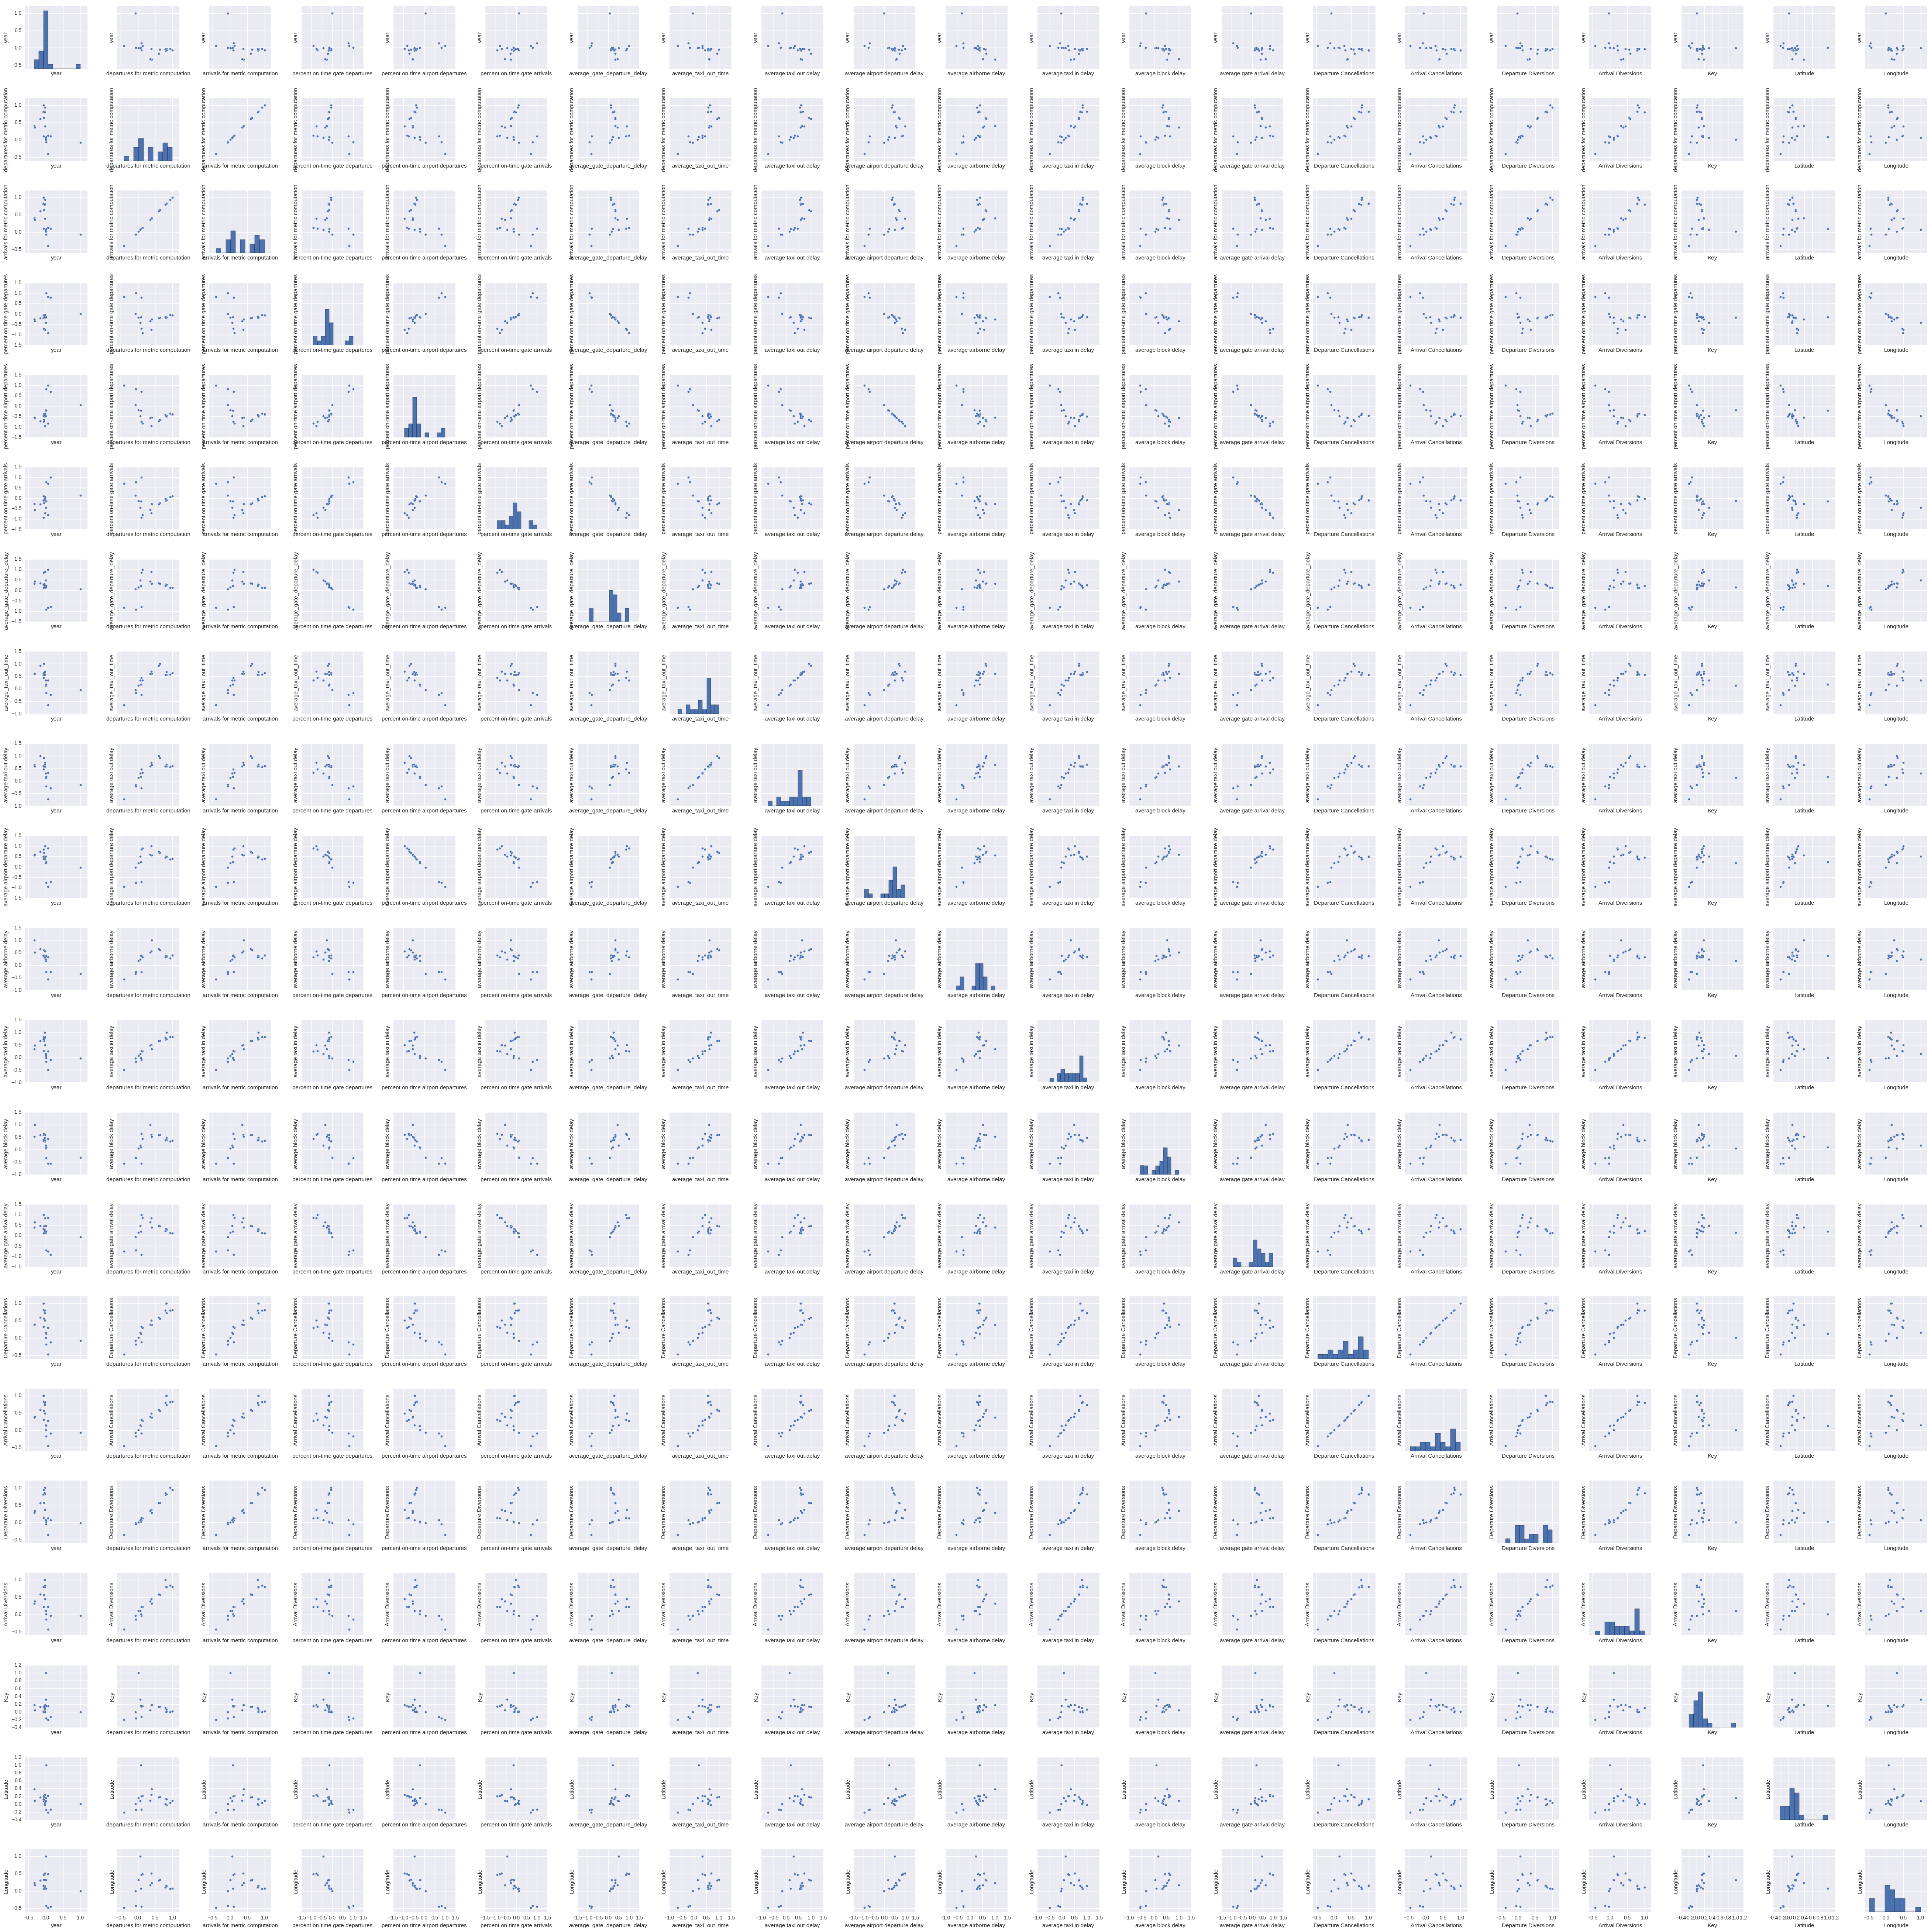

In [30]:
# I opened the image in a new tab to zoom in and look at stuff
# Adding axis labels to each pairplot
g = sns.pairplot(df.corr())

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

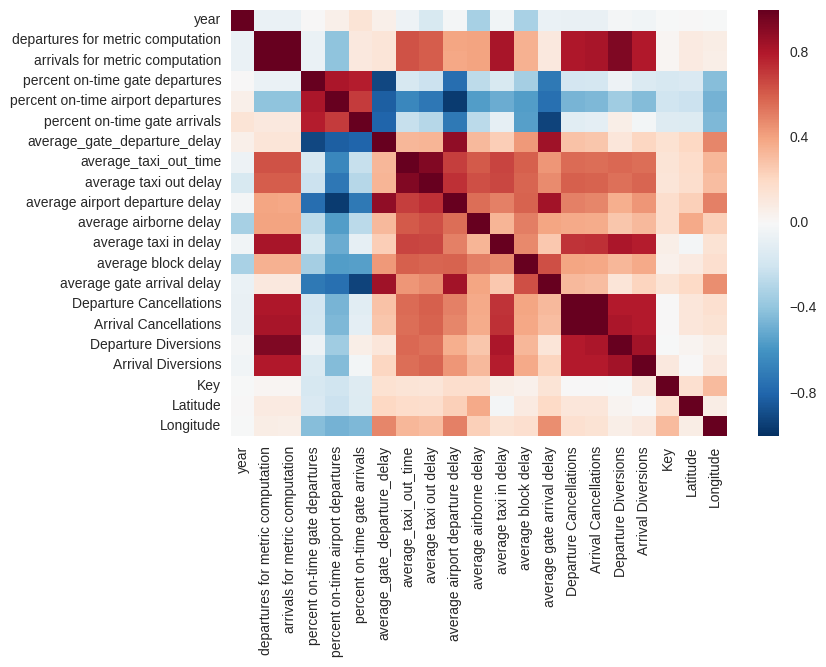

In [31]:
sns.heatmap(df.corr())

In [32]:
df.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  Departure Cancellations  Arrival Cancellations  \
0                       10.87                    242.0                  235.0   
1                       10.24                    221.0                  190.0   
2                       11.82                    392.0                  329.0   
3                       12.71                    366.0                  304.0   
4                       11.48                    333.0                  300.0   

   Departure Diversions  Arrival Diversions     Key                   AP_NAME  \
0                  71.0                46.0  2348.0  ALBUQUERQUE INTL SUNPORT   
1                  61.0                33.0  2348.0  ALBUQUERQUE INTL SUNPORT   
2                  71.0               124.0  2348.0  ALBUQUERQUE INTL SUNPORT   
3                 107.0                45.0  2348.0  ALBUQUERQUE INTL SUNPORT   
4                  79.0                42.0  2348.0  ALBUQUERQUE INTL SUNPORT   

                       ALIAS Facility Type FAA REGION      COUNTY  \
0  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
1  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
2  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
3  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   
4  Albuquerque Int'l Sunport       Airport        ASW  BERNALILLO   

          CITY STATE                 AP Type   Latitude   Longitude  \
0  ALBUQUERQUE    NM  Federalized/Commercial  35.040194 -106.609194   
1  ALBUQUERQUE    NM  Federalized/Commercial  35.040194 -106.609194   
2  ALBUQUERQUE    NM  Federalized/Commercial  35.04019

In [33]:
df['FAA REGION'].value_counts()

AWP    177
ASO    176
AEA    132
AGL     94
ASW     88
ANM     44
ANE     44
ACE     33
AAL     11
Name: FAA REGION, dtype: int64

In [34]:
df['STATE'].value_counts()

CA    122
FL     77
NY     66
TX     66
IL     28
PA     22
TN     22
KY     22
NC     22
AZ     22
OH     22
HI     22
MO     22
DC     22
NJ     11
NM     11
NH     11
LA     11
NE     11
WI     11
OR     11
NV     11
PR     11
RI     11
CO     11
AK     11
AL     11
GA     11
IN     11
CT     11
MD     11
MA     11
UT     11
MN     11
MI     11
WA     11
Name: STATE, dtype: int64

In [35]:
df['AP Type'].value_counts()

Federalized/Commercial    748
Public Use                 51
Name: AP Type, dtype: int64

In [36]:
df[df['AP Type'] == 'Public Use']['airport'].unique()

array([u'BOS', u'CVG', u'DCA', u'MSY', u'OXR'], dtype=object)

#### Are there any unique values? 

Most of the delay columns are highly correlated with each other.

### Part 2: Data Mining

#### 2.1 Create Dummy Variables

In [37]:
df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'Key', u'AP_NAME',
       u'ALIAS', u'Facility Type', u'FAA REGION', u'COUNTY', u'CITY', u'STATE',
       u'AP Type', u'Latitude', u'Longitude', u'Boundary Data Available'],
      dtype='object')

In [38]:
# Making a list of all numerical columns 
num_cols = ['airport'] # I want to keep the airport column even though it's not numeric for reference

for col in df:
    if df[col].dtype != 'O': # If not object dtype
        if col != 'Key': # I don't want this one, it's the numeric key for each specific airport
            num_cols.append(col)

In [39]:
num_cols

['airport',
 'year',
 'departures for metric computation',
 'arrivals for metric computation',
 'percent on-time gate departures',
 'percent on-time airport departures',
 'percent on-time gate arrivals',
 'average_gate_departure_delay',
 'average_taxi_out_time',
 'average taxi out delay',
 'average airport departure delay',
 'average airborne delay',
 'average taxi in delay',
 'average block delay',
 'average gate arrival delay',
 'Departure Cancellations',
 'Arrival Cancellations',
 'Departure Diversions',
 'Arrival Diversions',
 'Latitude',
 'Longitude']

In [40]:
dummies = pd.get_dummies(df[['airport', 'FAA REGION', 'STATE', 'AP Type']])
dummies.head()

airport_ABQ  airport_ANC  airport_ATL  airport_AUS  airport_BDL  \
0          1.0          0.0          0.0          0.0          0.0   
1          1.0          0.0          0.0          0.0          0.0   
2          1.0          0.0          0.0          0.0          0.0   
3          1.0          0.0          0.0          0.0          0.0   
4          1.0          0.0          0.0          0.0          0.0   

   airport_BHM  airport_BNA  airport_BOS  airport_BUF  airport_BUR  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_BWI  airport_CLE  airport_CLT  airport_CVG  airport_DAL  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_DAY  airport_DCA  airport_DEN  airport_DFW  airport_DTW  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_EWR  airport_FLL  airport_HNL  airport_HOU  airport_HPN  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_IAD  airport_IAH  airport_IND  airport_ISP  airport_JAX  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_JFK  airport_LAS  airport_LAX  airport_LGA  airport_LGB  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_MCI  airport_MCO  airport_MDW  airport_MEM  airport_MHT  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_MIA  airport_MKE  airport_MSP  airport_MSY  airport_OAK  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   airport_OGG  airport_OMA  airport_ONT  airport_ORD  airport_OXR  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2   

In [41]:
numerical_df = df[num_cols]

analytic_df = numerical_df.join(dummies)

analytic_df.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  Departure Cancellations  Arrival Cancellations  \
0                       10.87                    242.0                  235.0   
1                       10.24                    221.0                  190.0   
2                       11.82                    392.0                  329.0   
3                       12.71                    366.0                  304.0   
4                       11.48                    333.0                  300.0   

   Departure Diversions  Arrival Diversions   Latitude   Longitude  \
0                  71.0                46.0  35.040194 -106.609194   
1                  61.0                33.0  35.040194 -106.609194   
2                  71.0               124.0  35.040194 -106.609194   
3                 107.0                45.0  35.040194 -106.609194   
4                  79.0                42.0  35.040194 -106.609194   

   airport_ABQ  airport_ANC  airport_ATL  airport_AUS  airport_BDL  \
0          1.0          0.0          0.0          0.0          0.0   
1          1.0          0.0          0.0          0.0          0.0   
2          1.0          0.0          0.0          0.0          0.0   
3          1.0          0.0          0.0          0.0          0.0   
4          1.0          0.0          0.0          0.0          0.0   

   airport_BHM  airport_BNA  airport_BOS  airport_BUF  airport_BUR  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0       

#### 2.2 Format and Clean the Data

The data is pretty much clean already.

### Part 3: Define the Data

#### 3.1 Confirm that the dataset has a normal distribution. How can you tell? 

year
Mean: 2009.01627034
Median: 2009.0


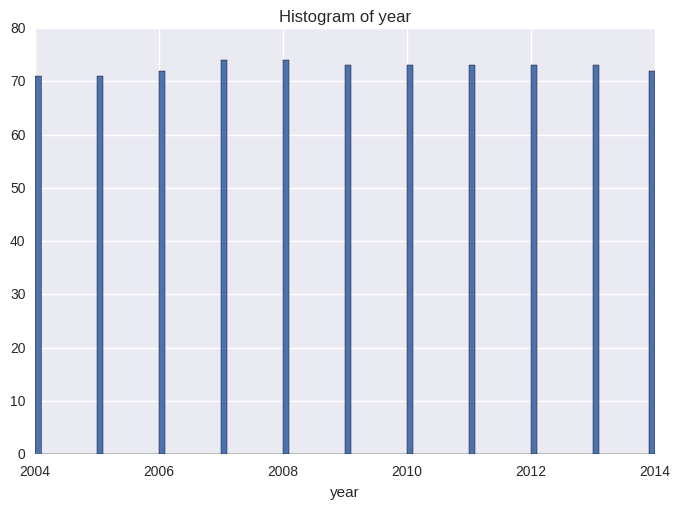

departures for metric computation
Mean: 113471.56821
Median: 79489.0


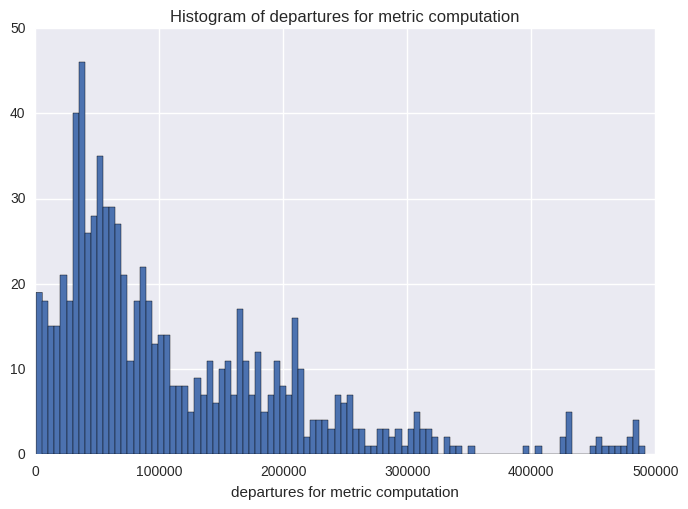

arrivals for metric computation
Mean: 113003.95995
Median: 79750.0


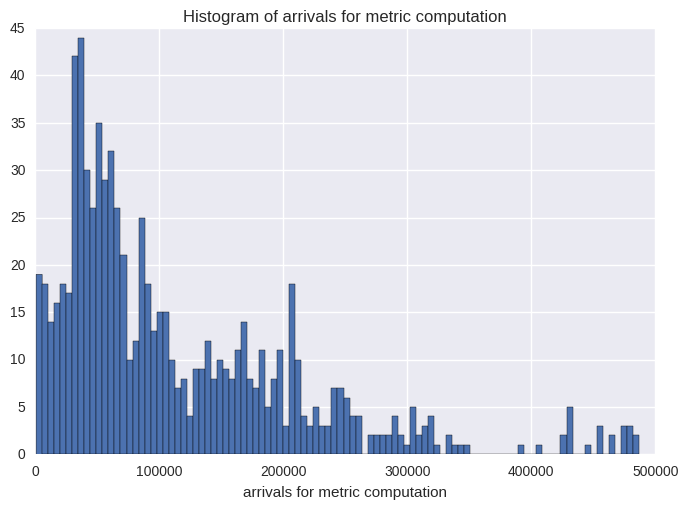

percent on-time gate departures
Mean: 0.779122778473
Median: 0.7841


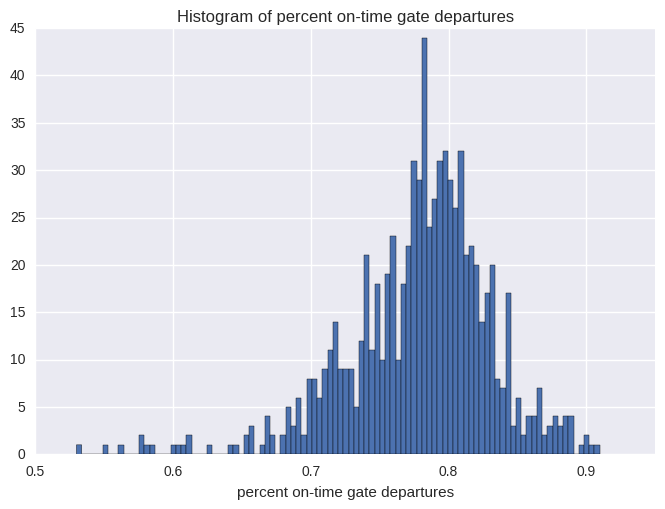

percent on-time airport departures
Mean: 0.726957571965
Median: 0.7402


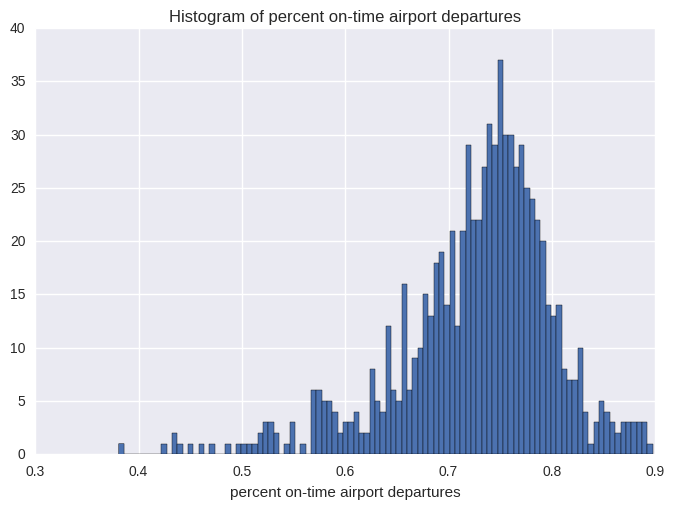

percent on-time gate arrivals
Mean: 0.766863954944
Median: 0.7705


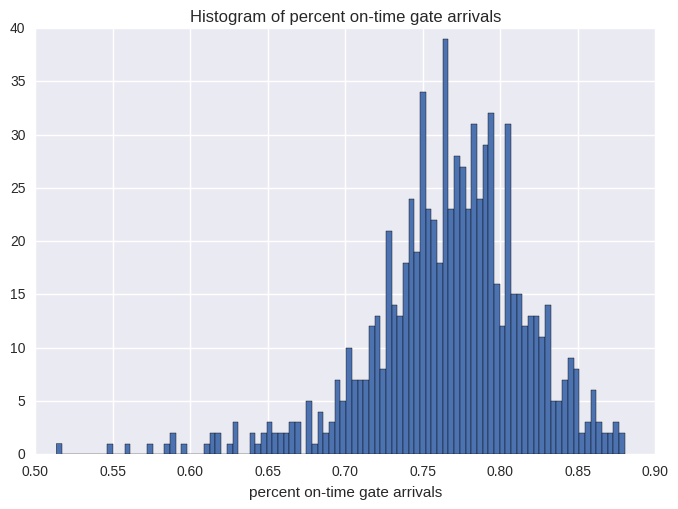

average_gate_departure_delay
Mean: 12.8902503129
Median: 12.54


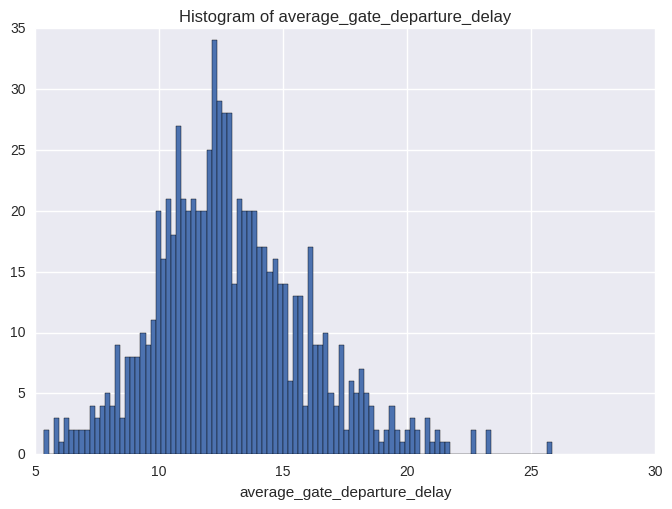

average_taxi_out_time
Mean: 13.8728785982
Median: 12.94


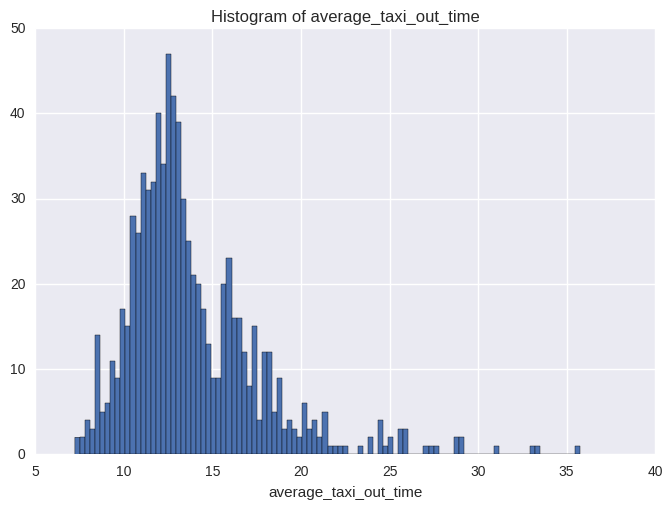

average taxi out delay
Mean: 3.68329161452
Median: 3.05


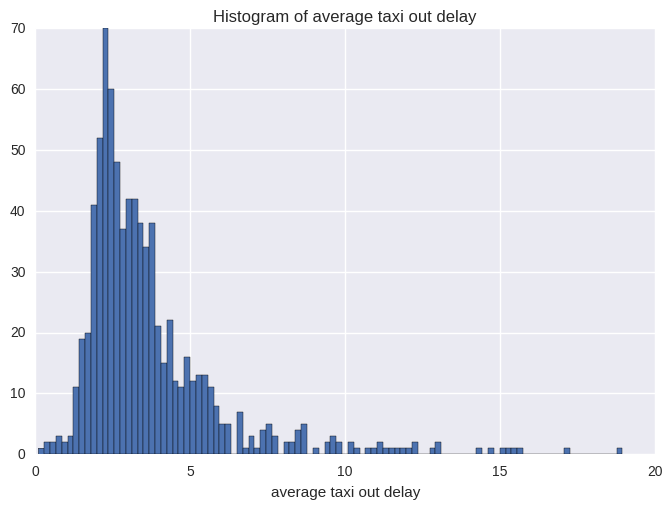

average airport departure delay
Mean: 15.7035043805
Median: 15.13


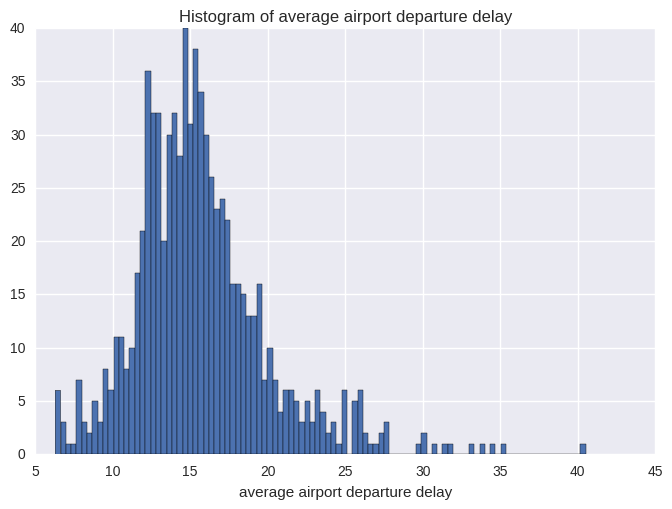

average airborne delay
Mean: 2.87553191489
Median: 2.62


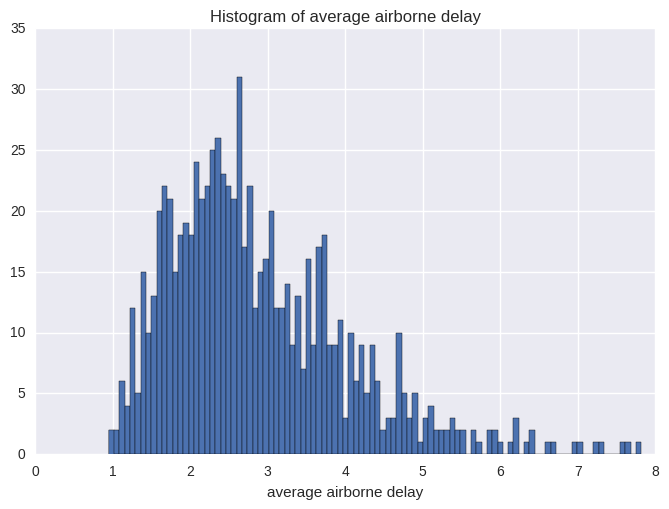

average taxi in delay
Mean: 1.41415519399
Median: 1.14


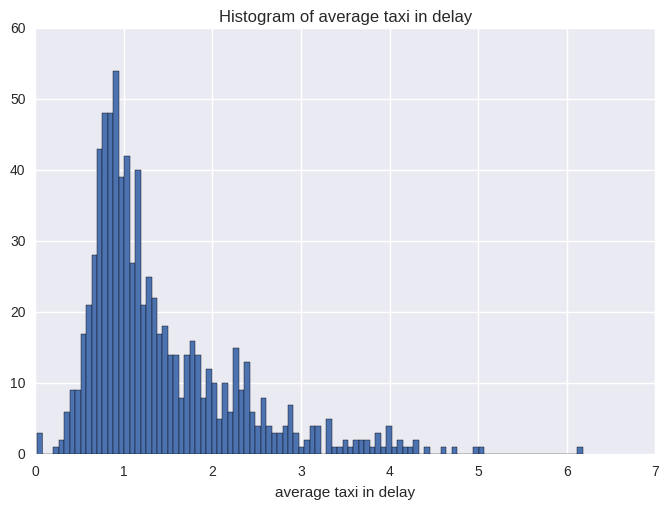

average block delay
Mean: 3.29082603254
Median: 3.13


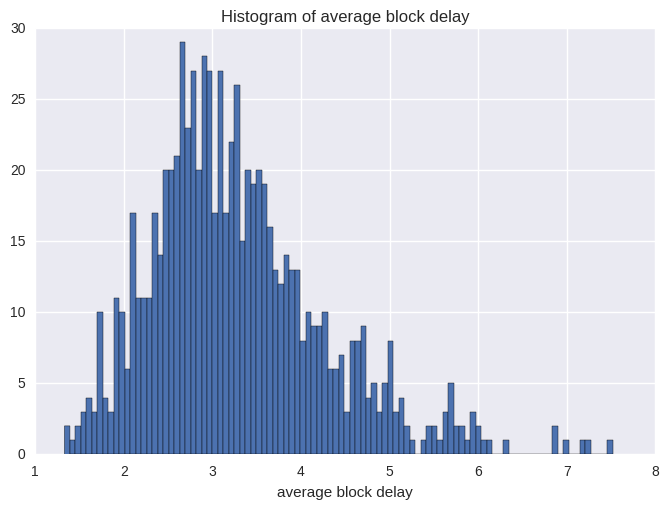

average gate arrival delay
Mean: 13.4288110138
Median: 12.97


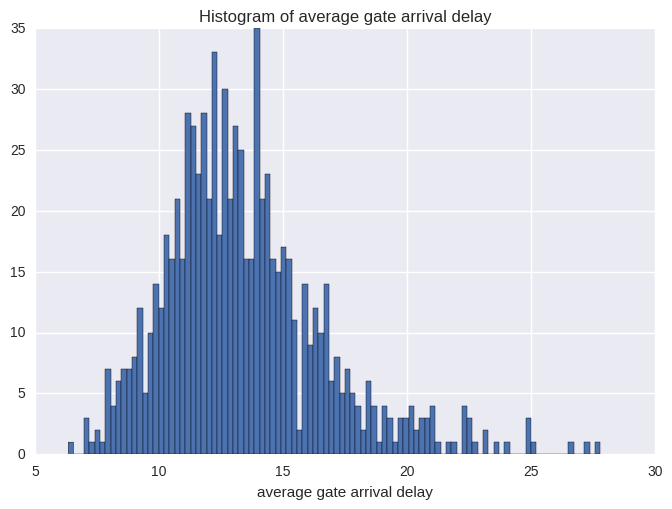

Departure Cancellations
Mean: 1299.31414268
Median: 670.0


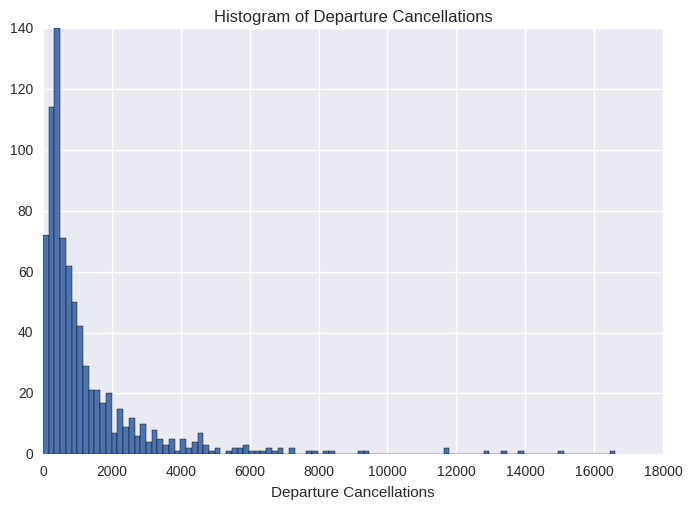

Arrival Cancellations
Mean: 1341.06883605
Median: 653.0


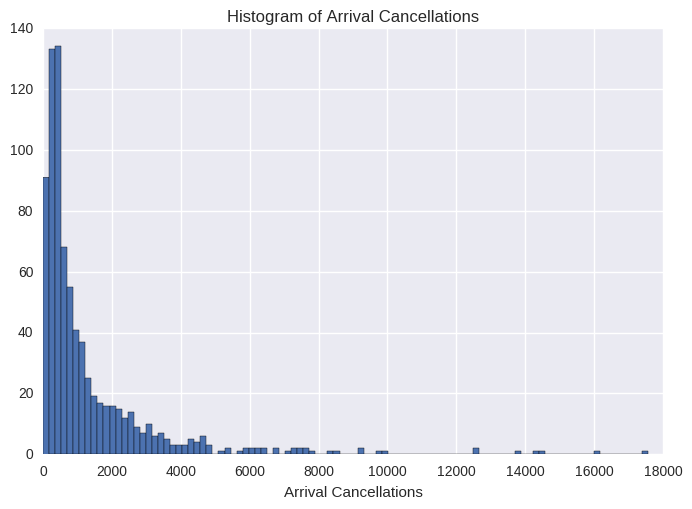

Departure Diversions
Mean: 174.250312891
Median: 111.0


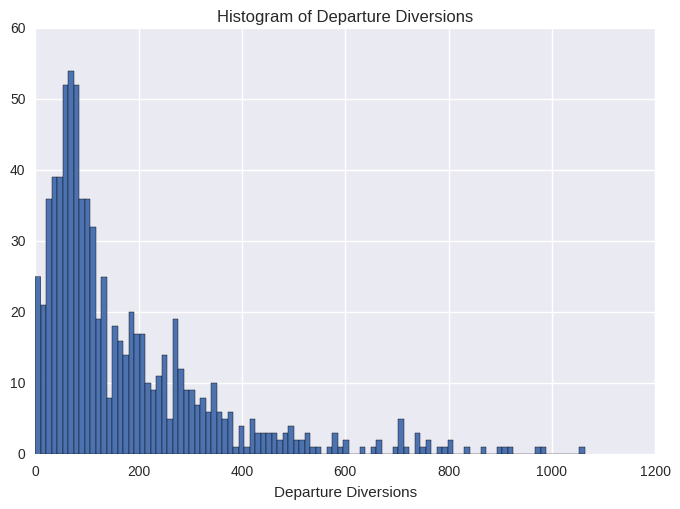

Arrival Diversions
Mean: 170.256570713
Median: 84.0


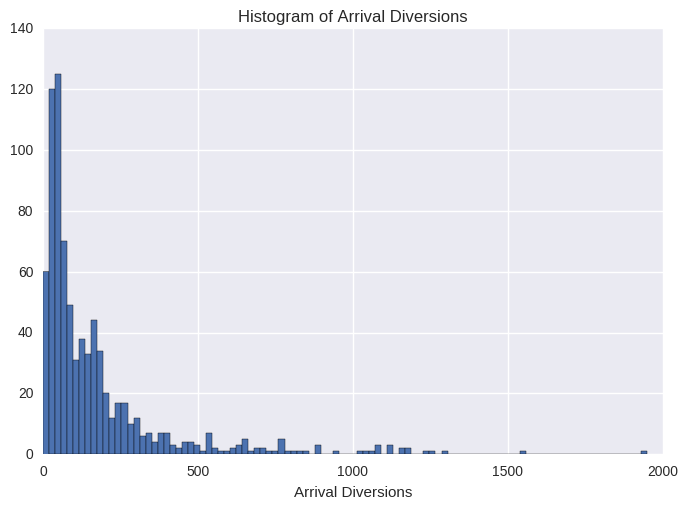

Latitude
Mean: 36.4488068986
Median: 37.618972


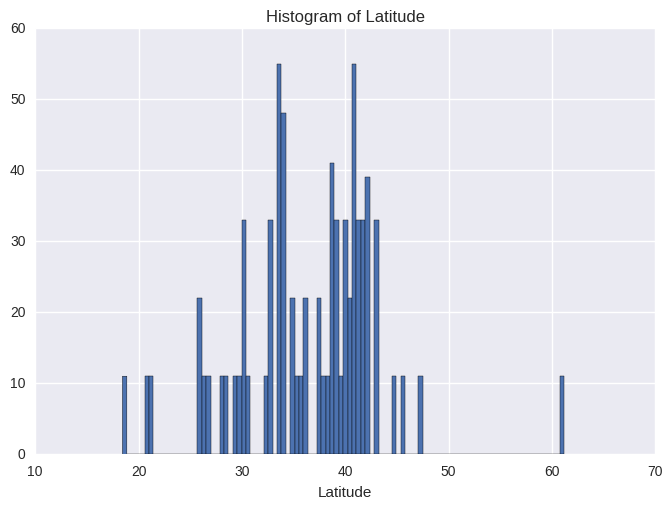

Longitude
Mean: -94.899998
Median: -87.897068


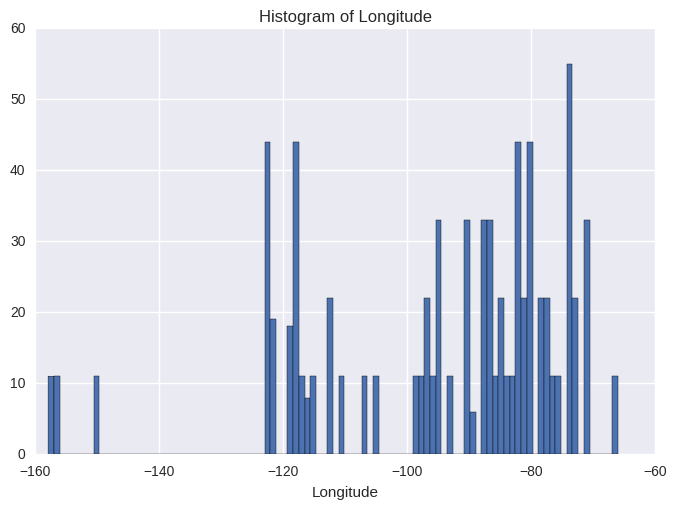

In [42]:
for col in num_cols[1:]: # Excluding first col, it was the airport that I included
    print col
    print 'Mean:', np.mean(df[col])
    print 'Median:', np.median(df[col])
    plt.hist(df[col], 100)
    plt.xlabel(col)
    plt.title('Histogram of '+str(col))
    plt.show()

Most of the data is normally distributed, especially the columns related to delay statistics.

#### 3.2 Find correlations in the data

In [43]:
df.corr()

year  \
year                                1.000000   
departures for metric computation  -0.068488   
arrivals for metric computation    -0.067507   
percent on-time gate departures     0.002818   
percent on-time airport departures  0.056174   
percent on-time gate arrivals       0.135191   
average_gate_departure_delay        0.061650   
average_taxi_out_time              -0.052435   
average taxi out delay             -0.160599   
average airport departure delay    -0.023332   
average airborne delay             -0.334442   
average taxi in delay              -0.031265   
average block delay                -0.321256   
average gate arrival delay         -0.064928   
Departure Cancellations            -0.074954   
Arrival Cancellations              -0.071526   
Departure Diversions               -0.021804   
Arrival Diversions                 -0.035331   
Key                                -0.004863   
Latitude                            0.002632   
Longitude                          -0.004275   

                                    departures for metric computation  \
year                                                        -0.068488   
departures for metric computation                            1.000000   
arrivals for metric computation                              0.999807   
percent on-time gate departures                             -0.063251   
percent on-time airport departures                          -0.399942   
percent on-time gate arrivals                                0.103680   
average_gate_departure_delay                                 0.131396   
average_taxi_out_time                                        0.638656   
average taxi out delay                                       0.604125   
average airport departure delay                              0.391838   
average airborne delay                                       0.401505   
average taxi in delay                                        0.823040   
average block delay                                          0.358669   
average gate arrival delay                                   0.102899   
Departure Cancellations                                      0.808959   
Arrival Cancellations                                        0.823676   
Departure Diversions                                         0.934147   
Arrival Diversions                                           0.798750   
Key                                                          0.015834   
Latitude                                                     0.091516   
Longitude                                                    0.070800   

                                    arrivals for metric computation  \
year                                                      -0.067507   
departures for metric computation                          0.999807   
arrivals for metric computation                            1.000000   
percent on-time gate departures                           -0.062713   
percent on-time airport departures                        -0.399040   
percent on-time gate arrivals                              0.104228   
average_gate_departure_delay                               0.129871   
average_taxi_out_time                                      0.636674   
average taxi out delay                                     0.603439   
average airport departure delay                            0.390470   
average airborne delay                                     0.400179   
average taxi in delay                                      0.822057   
average block delay                                        0.355442   
average gate arrival delay                                 0.101622   
Departure Cancellations                                    0.809994   
Arrival Cancellations                                      0.824622   
Departure Diversions                                       0.934035   
Arrival Diversions                                         0.799456   
Key                        

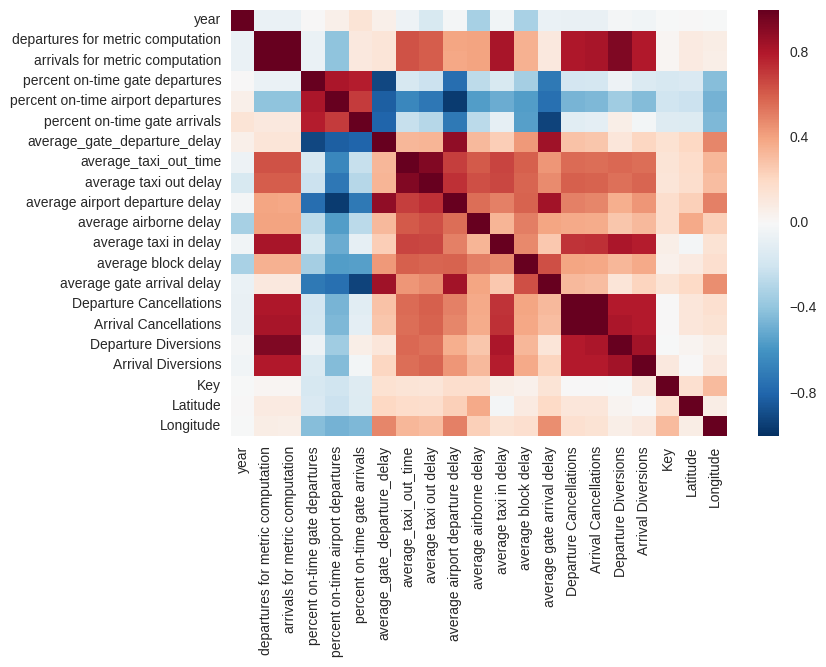

In [44]:
sns.heatmap(df.corr())

#### 3.3 What is the value of understanding correlations before PCA? 

Answer: 

It gives me a sense of which columns will be incorporated by the PCA. 

#### 3.4 Validate your findings using statistical analysis

Not sure what this even means.

#### 3.5 How can you improve your overall analysis? 

Answer: 

### Part 4: Perform a PCA and Present Findings

#### 4.1 Conduct the PCA

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

First doing this with all the dummies and stuff I used above included, then I'll try without dummies.

In [46]:
X_all = StandardScaler().fit_transform(analytic_df.drop(['airport', 'average airport departure delay'], axis=1))
y = analytic_df['average airport departure delay']

In [47]:
pca_all = PCA()
pca_x_all = pca_all.fit_transform(X_all)
pca_all.explained_variance_ratio_

array([  7.42535563e-02,   4.38461611e-02,   2.95661589e-02,
         2.89500621e-02,   2.51641463e-02,   2.43194343e-02,
         2.31804368e-02,   2.27145544e-02,   2.17455040e-02,
         2.13567013e-02,   1.87667340e-02,   1.73752993e-02,
         1.62979534e-02,   1.54934017e-02,   1.51658387e-02,
         1.49801393e-02,   1.49069389e-02,   1.47821385e-02,
         1.47142989e-02,   1.46577302e-02,   1.46384820e-02,
         1.46127304e-02,   1.45856405e-02,   1.45691366e-02,
         1.45501526e-02,   1.45449440e-02,   1.45265729e-02,
         1.45160644e-02,   1.45065608e-02,   1.45021156e-02,
         1.44973644e-02,   1.44951665e-02,   1.44881478e-02,
         1.44865640e-02,   1.44859195e-02,   1.17462811e-02,
         1.16704907e-02,   1.00636098e-02,   9.26117124e-03,
         8.73180583e-03,   8.47094840e-03,   8.18706668e-03,
         7.89725688e-03,   7.64684478e-03,   7.53805165e-03,
         7.51531223e-03,   7.38860109e-03,   7.34510390e-03,
         7.31204147e-03,

In [48]:
np.cumsum(pca_all.explained_variance_ratio_)

array([ 0.07425356,  0.11809972,  0.14766588,  0.17661594,  0.20178008,
        0.22609952,  0.24927996,  0.27199451,  0.29374001,  0.31509672,
        0.33386345,  0.35123875,  0.3675367 ,  0.3830301 ,  0.39819594,
        0.41317608,  0.42808302,  0.44286516,  0.45757946,  0.47223719,
        0.48687567,  0.5014884 ,  0.51607404,  0.53064318,  0.54519333,
        0.55973827,  0.57426485,  0.58878091,  0.60328747,  0.61778959,
        0.63228695,  0.64678212,  0.66127027,  0.67575683,  0.69024275,
        0.70198903,  0.71365952,  0.72372313,  0.7329843 ,  0.74171611,
        0.75018706,  0.75837412,  0.76627138,  0.77391823,  0.78145628,
        0.78897159,  0.79636019,  0.80370529,  0.81101734,  0.81830675,
        0.82556115,  0.83281049,  0.84005761,  0.84730166,  0.85454435,
        0.86178691,  0.86902948,  0.87627205,  0.88351462,  0.89075718,
        0.89799975,  0.90524232,  0.91248488,  0.91972745,  0.92697002,
        0.93421258,  0.94145515,  0.94869772,  0.95594029,  0.96

Need 62 components to get to 90%.

In [49]:
pca_x_all[0:5]

array([[  2.87559434e+00,  -4.22282467e-01,   9.00650647e-01,
         -9.67940951e-02,   4.38022203e-01,  -3.56871806e+00,
         -1.13142833e+00,  -1.55526111e+00,   1.56966771e+00,
          4.61203053e-01,   1.46986731e+00,   6.64726581e-01,
          1.48607179e+00,   1.02838357e+00,   2.83556551e+00,
          3.05368023e+00,  -1.27354819e-01,   3.44796522e+00,
          6.15935618e-01,   2.47325214e+00,   4.00102171e+00,
          2.57129976e+00,   1.54482451e-01,  -1.10774700e+00,
          3.73291027e-02,  -2.86818879e+00,   4.16083161e+00,
          3.23772390e+00,   1.60007468e+00,   2.70351783e+00,
          2.20618449e+00,  -1.30003995e+00,  -2.54375124e+00,
          1.93105675e+00,  -9.82113062e-01,  -6.22413376e-01,
          1.83920510e+00,  -4.69059812e-01,   1.00495258e+00,
         -1.46902852e-01,   2.10466343e-01,  -7.11715310e-01,
          1.70420761e-01,  -1.64573746e-01,   8.12445357e-02,
         -3.36333788e-01,   1.62309678e-01,  -6.43715056e-02,
        

In [50]:
pca_x_all.shape

(799, 140)

Reducing to 62 components, which includes over 90%.

In [51]:
pca_62 = PCA(62)
pca_x_62 = pca_62.fit_transform(X_all)
pca_62.explained_variance_ratio_

array([ 0.07425356,  0.04384616,  0.02956616,  0.02895006,  0.02516415,
        0.02431943,  0.02318044,  0.02271455,  0.0217455 ,  0.0213567 ,
        0.01876673,  0.0173753 ,  0.01629795,  0.0154934 ,  0.01516584,
        0.01498014,  0.01490694,  0.01478214,  0.0147143 ,  0.01465773,
        0.01463848,  0.01461273,  0.01458564,  0.01456914,  0.01455015,
        0.01454494,  0.01452657,  0.01451606,  0.01450656,  0.01450212,
        0.01449736,  0.01449517,  0.01448815,  0.01448656,  0.01448592,
        0.01174628,  0.01167049,  0.01006361,  0.00926117,  0.00873181,
        0.00847095,  0.00818707,  0.00789726,  0.00764684,  0.00753805,
        0.00751531,  0.0073886 ,  0.0073451 ,  0.00731204,  0.00728941,
        0.0072544 ,  0.00724934,  0.00724712,  0.00724405,  0.00724269,
        0.00724257,  0.00724257,  0.00724257,  0.00724257,  0.00724257,
        0.00724257,  0.00724257])

In [52]:
np.cumsum(pca_62.explained_variance_ratio_)

array([ 0.07425356,  0.11809972,  0.14766588,  0.17661594,  0.20178008,
        0.22609952,  0.24927996,  0.27199451,  0.29374001,  0.31509672,
        0.33386345,  0.35123875,  0.3675367 ,  0.3830301 ,  0.39819594,
        0.41317608,  0.42808302,  0.44286516,  0.45757946,  0.47223719,
        0.48687567,  0.5014884 ,  0.51607404,  0.53064318,  0.54519333,
        0.55973827,  0.57426485,  0.58878091,  0.60328747,  0.61778959,
        0.63228695,  0.64678212,  0.66127027,  0.67575683,  0.69024275,
        0.70198903,  0.71365952,  0.72372313,  0.7329843 ,  0.74171611,
        0.75018706,  0.75837412,  0.76627138,  0.77391823,  0.78145628,
        0.78897159,  0.79636019,  0.80370529,  0.81101734,  0.81830675,
        0.82556115,  0.83281049,  0.84005761,  0.84730166,  0.85454435,
        0.86178691,  0.86902948,  0.87627205,  0.88351462,  0.89075718,
        0.89799975,  0.90524232])

In [53]:
pca_x_62[0:5]

array([[  2.87559434e+00,  -4.22282467e-01,   9.00650647e-01,
         -9.67940951e-02,   4.38022203e-01,  -3.56871806e+00,
         -1.13142833e+00,  -1.55526111e+00,   1.56966771e+00,
          4.61203053e-01,   1.46986731e+00,   6.64726581e-01,
          1.48607179e+00,   1.02838357e+00,   2.83556551e+00,
          3.05368023e+00,  -1.27354819e-01,   3.44796522e+00,
          6.15935618e-01,   2.47325214e+00,   4.00102171e+00,
          2.57129976e+00,   1.54482451e-01,  -1.10774700e+00,
          3.73291027e-02,  -2.86818879e+00,   4.16083161e+00,
          3.23772390e+00,   1.60007468e+00,   2.70351783e+00,
          2.20618449e+00,  -1.30003995e+00,  -2.54375124e+00,
          1.93105675e+00,  -9.82113062e-01,  -6.22413376e-01,
          1.83920510e+00,  -4.69059812e-01,   1.00495258e+00,
         -1.46902852e-01,   2.10466343e-01,  -7.11715310e-01,
          1.70420761e-01,  -1.64573746e-01,   8.12445357e-02,
         -3.36333788e-01,   1.62309678e-01,  -6.43715056e-02,
        

In [54]:
pca_x_62.shape

(799, 62)

Now testing it on just the original numerical dataset, with no dummies.

In [55]:
X_light = StandardScaler().fit_transform(numerical_df.drop(['airport', 'average airport departure delay'], axis=1))

In [56]:
pca_light = PCA()
pca_x_light = pca_light.fit_transform(X_light)
pca_light.explained_variance_ratio_

array([  4.55381880e-01,   2.15656192e-01,   7.77346214e-02,
         5.80066493e-02,   4.79577927e-02,   3.88116299e-02,
         2.76198131e-02,   2.00291706e-02,   1.60240825e-02,
         1.26531680e-02,   9.37661971e-03,   8.64357360e-03,
         5.67081802e-03,   2.99056076e-03,   2.47625484e-03,
         6.65353471e-04,   2.09637013e-04,   8.32864161e-05,
         8.89732143e-06])

In [57]:
np.cumsum(pca_light.explained_variance_ratio_)

array([ 0.45538188,  0.67103807,  0.74877269,  0.80677934,  0.85473713,
        0.89354876,  0.92116858,  0.94119775,  0.95722183,  0.969875  ,
        0.97925162,  0.98789519,  0.99356601,  0.99655657,  0.99903283,
        0.99969818,  0.99990782,  0.9999911 ,  1.        ])

In [58]:
pca_x_light[0:5]

array([[  2.49981840e+00,  -4.79600329e-01,   9.99318274e-01,
         -7.59521478e-01,  -7.78810127e-01,  -7.86624202e-01,
         -3.14580348e-01,   1.07128550e-01,  -5.64340757e-01,
         -9.85671803e-02,   3.20282544e-02,  -8.76815743e-02,
         -2.79688195e-02,  -3.37092008e-02,   1.07195581e-01,
         -4.60514314e-02,   2.42799538e-02,  -1.46185441e-02,
         -2.20237630e-03],
       [  2.83753702e+00,  -8.33922973e-01,   8.19479557e-01,
         -5.63529676e-01,  -5.81685700e-01,  -7.39540194e-01,
         -2.13649080e-01,   1.09435823e-01,  -5.88565618e-01,
         -9.42245850e-02,  -2.04005340e-02,  -1.86281279e-01,
         -1.20637780e-01,   2.85345568e-02,   8.70618998e-02,
         -5.14418429e-02,   1.43890576e-02,  -2.71750368e-03,
         -1.86889746e-03],
       [  2.31527274e+00,  -2.20498915e-01,   3.59451197e-01,
         -6.77490455e-01,  -7.29351339e-01,  -3.87534470e-01,
         -1.42795011e-02,   8.01329629e-02,  -4.87253559e-01,
         -3.3039

In [59]:
pca_x_light.shape

(799, 19)

Reducing to only 7 components, which includes over 94%.

In [60]:
pca_7 = PCA(7)
pca_x_7 = pca_7.fit_transform(X_light)
pca_7.explained_variance_ratio_

array([ 0.45538188,  0.21565619,  0.07773462,  0.05800665,  0.04795779,
        0.03881163,  0.02761981])

In [61]:
np.cumsum(pca_7.explained_variance_ratio_)

array([ 0.45538188,  0.67103807,  0.74877269,  0.80677934,  0.85473713,
        0.89354876,  0.92116858])

In [62]:
pca_x_7[0:5]

array([[ 2.4998184 , -0.47960033,  0.99931827, -0.75952148, -0.77881013,
        -0.7866242 , -0.31458035],
       [ 2.83753702, -0.83392297,  0.81947956, -0.56352968, -0.5816857 ,
        -0.73954019, -0.21364908],
       [ 2.31527274, -0.22049892,  0.3594512 , -0.67749045, -0.72935134,
        -0.38753447, -0.0142795 ],
       [ 1.920972  , -0.0235492 ,  0.29829099, -0.70591896, -0.50205744,
         0.05133542,  0.13455621],
       [ 2.46588504, -0.46613793,  0.09775516, -0.40095749, -0.28041442,
         0.00575055,  0.17700073]])

In [63]:
pca_x_7.shape

(799, 7)

In [64]:
# Append PCA components into the table
for i in range(len(pca_x_7[0])):
    numerical_df['PCA_'+str(i+1)] = [component[i] for component in pca_x_7]

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [65]:
numerical_df.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  Departure Cancellations  Arrival Cancellations  \
0                       10.87                    242.0                  235.0   
1                       10.24                    221.0                  190.0   
2                       11.82                    392.0                  329.0   
3                       12.71                    366.0                  304.0   
4                       11.48                    333.0                  300.0   

   Departure Diversions  Arrival Diversions   Latitude   Longitude     PCA_1  \
0                  71.0                46.0  35.040194 -106.609194  2.499818   
1                  61.0                33.0  35.040194 -106.609194  2.837537   
2                  71.0               124.0  35.040194 -106.609194  2.315273   
3                 107.0                45.0  35.040194 -106.609194  1.920972   
4                  79.0                42.0  35.040194 -106.609194  2.465885   

      PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  
0 -0.479600  0.999318 -0.759521 -0.778810 -0.786624 -0.314580  
1 -0.833923  0.819480 -0.563530 -0.581686 -0.739540 -0.213649  
2 -0.220499  0.359451 -0.677490 -0.729351 -0.387534 -0.014280  
3 -0.023549  0.298291 -0.705919 -0.502057  0.051335  0.134556  
4 -0.466138  0.097755 -0.400957 -0.280414  0.005751  0.177001

In [66]:
numerical_df.corr()

year  \
year                                1.000000   
departures for metric computation  -0.068488   
arrivals for metric computation    -0.067507   
percent on-time gate departures     0.002818   
percent on-time airport departures  0.056174   
percent on-time gate arrivals       0.135191   
average_gate_departure_delay        0.061650   
average_taxi_out_time              -0.052435   
average taxi out delay             -0.160599   
average airport departure delay    -0.023332   
average airborne delay             -0.334442   
average taxi in delay              -0.031265   
average block delay                -0.321256   
average gate arrival delay         -0.064928   
Departure Cancellations            -0.074954   
Arrival Cancellations              -0.071526   
Departure Diversions               -0.021804   
Arrival Diversions                 -0.035331   
Latitude                            0.002632   
Longitude                          -0.004275   
PCA_1                               0.131108   
PCA_2                              -0.042105   
PCA_3                              -0.668961   
PCA_4                               0.484195   
PCA_5                               0.328713   
PCA_6                               0.382710   
PCA_7                               0.062631   

                                    departures for metric computation  \
year                                                        -0.068488   
departures for metric computation                            1.000000   
arrivals for metric computation                              0.999807   
percent on-time gate departures                             -0.063251   
percent on-time airport departures                          -0.399942   
percent on-time gate arrivals                                0.103680   
average_gate_departure_delay                                 0.131396   
average_taxi_out_time                                        0.638656   
average taxi out delay                                       0.604125   
average airport departure delay                              0.391838   
average airborne delay                                       0.401505   
average taxi in delay                                        0.823040   
average block delay                                          0.358669   
average gate arrival delay                                   0.102899   
Departure Cancellations                                      0.808959   
Arrival Cancellations                                        0.823676   
Departure Diversions                                         0.934147   
Arrival Diversions                                           0.798750   
Latitude                                                     0.091516   
Longitude                                                    0.070800   
PCA_1                                                       -0.810984   
PCA_2                                                       -0.513353   
PCA_3                                                       -0.063587   
PCA_4                                                        0.035958   
PCA_5                                                       -0.062361   
PCA_6                                                       -0.049949   
PCA_7                                                       -0.117155   

                                    arrivals for metric computation  \
year                                                      -0.067507   
departures for metric computation                          0.999807   
arrivals for metric computation                            1.000000   
percent on-time gate departures                           -0.062713   
percent on-time airport departures                        -0.399040   
percent on-time gate arrivals                              0.104228   
average_gate_departure_delay                               0.129871   
average_taxi_out_time                                      0.636674   
average tax

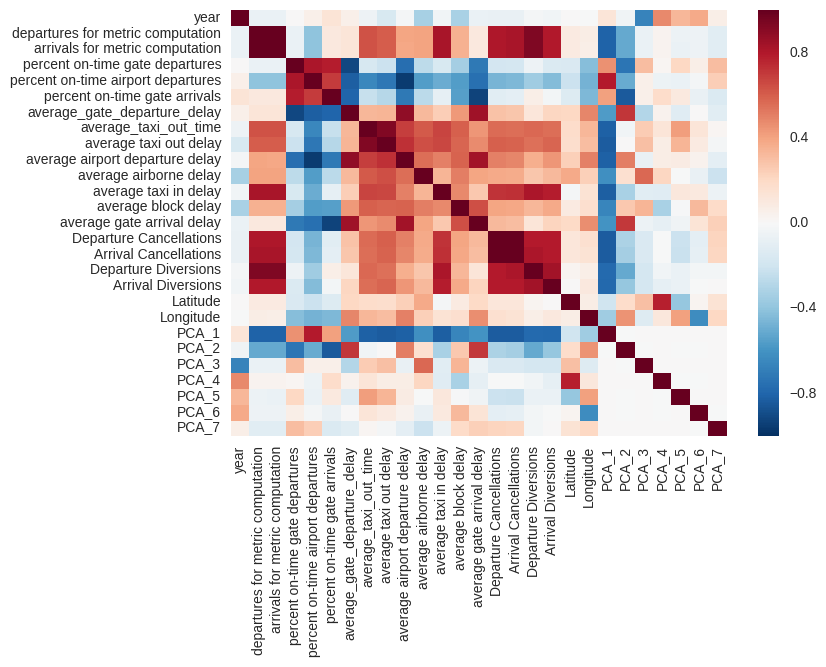

In [67]:
sns.heatmap(numerical_df.corr())

In [68]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_x_62, y, random_state=42)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results = {}

def evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    grid = GridSearchCV(model, param_grid=params[model_name], cv=3)
    grid.fit(X_train, y_train)
    predictions = grid.predict(X_test)
    print 'Model tested:', model_name
    print 'Best params:', grid.best_params_
    print 'Train Score:', grid.score(X_train, y_train)
    print 'Test Score:', grid.score(X_test, y_test)
#     print pd.DataFrame(confusion_matrix(y_test, predictions), index=['predicted_high_rating', 'predicted_not_high_rating'], columns=['is_high_rating', 'not_high_rating'])
#     print classification_report(y_test, predictions)
    plt.scatter(y_test, predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()
    results.update({model_name: grid.score(X_test, y_test)})

In [70]:
from sklearn.grid_search import GridSearchCV

# For most of these, I kinda have no idea what 'good' parameters to grid search over are
# I kinda guessed/took what I could find by googling
params = {
    'bagging_decision_tree': {"max_samples": [5, 10, 15],
                             "max_features": [1, 2, 3],
                             "bootstrap": [True, False]},
    'random_forest': {"n_estimators": [10, 100, 1000],
              "max_depth": [3, None],
              "max_features": [0.25, 0.5, 0.75, 1.0],
              "bootstrap": [True, False]},
    'extra_trees': {"n_estimators": [10, 100, 1000],
                   "max_depth": [3, None],
                   "max_features": [0.25, 0.5, 0.75, 1.0],
                   "bootstrap": [True, False]},
    'adaboost': {"n_estimators": [10, 50, 100],
                "learning_rate": [1, 0.5, 0.25],
                "loss" : ['linear', 'square', 'exponential']},
    'gradient_boosting': {"n_estimators": [10, 100, 200],
                          "max_depth": [3, None],}
}

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

brdt = BaggingRegressor(DecisionTreeRegressor())
rfr = RandomForestRegressor(n_jobs=-1)
etr = ExtraTreesRegressor(n_jobs=-1)
adr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

models = {
    'bagging_decision_tree': brdt,
    'random_forest': rfr,
    'extra_trees': etr,
    'adaboost': adr,
    'gradient_boosting': gbr
}

Model tested: gradient_boosting
Best params: {'n_estimators': 200, 'max_depth': 3}
Train Score: 0.995353046897
Test Score: 0.951347668067


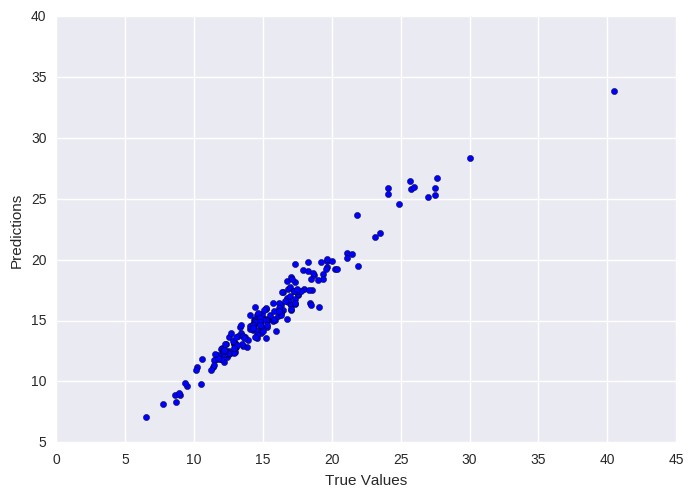

Model tested: adaboost
Best params: {'n_estimators': 100, 'loss': 'linear', 'learning_rate': 1}
Train Score: 0.934652300033
Test Score: 0.886925533084


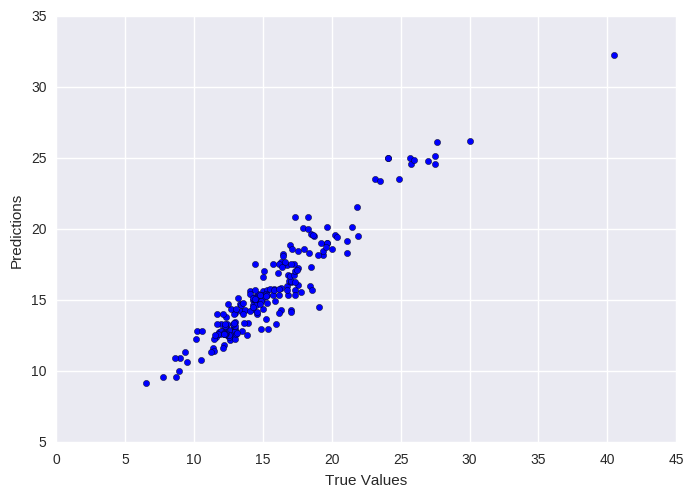

Model tested: random_forest
Best params: {'max_features': 1.0, 'n_estimators': 1000, 'bootstrap': True, 'max_depth': None}
Train Score: 0.992216228191
Test Score: 0.931220286924


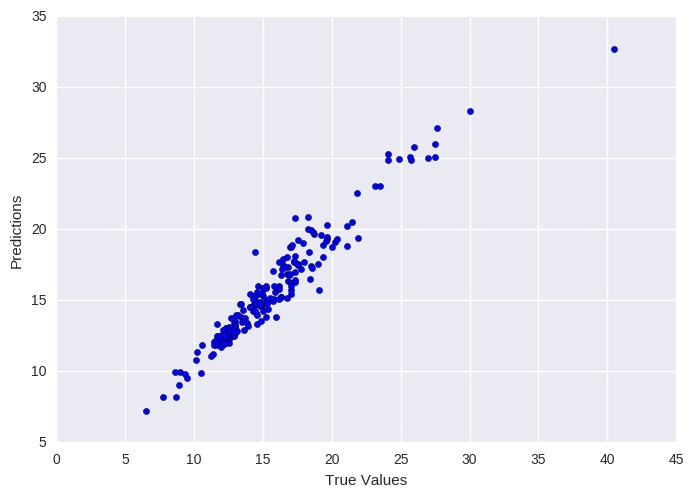

Model tested: bagging_decision_tree
Best params: {'max_features': 2, 'max_samples': 15, 'bootstrap': True}
Train Score: 0.150741742509
Test Score: 0.0893748448222


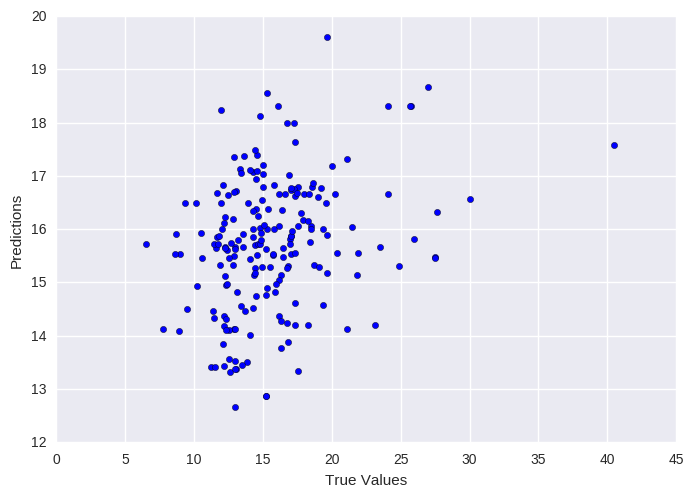

Model tested: extra_trees
Best params: {'max_features': 1.0, 'n_estimators': 1000, 'bootstrap': False, 'max_depth': None}
Train Score: 1.0
Test Score: 0.945890167684


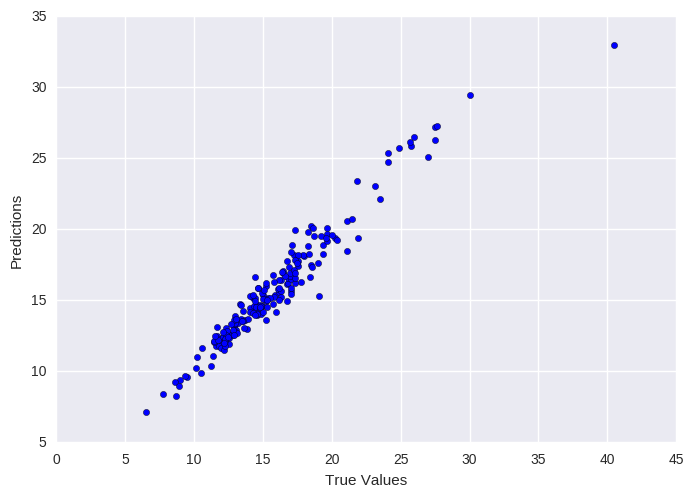

{'bagging_decision_tree': 0.089374844822234567, 'extra_trees': 0.94589016768388756, 'gradient_boosting': 0.95134766806693272, 'random_forest': 0.93122028692365744, 'adaboost': 0.8869255330839384}


In [72]:
# Get the best grid searched model of each type

results = {}

for key, value in models.items():
    counter = 0
    evaluate_model(X_train, X_test, y_train, y_test, value, key)
    
print results

And now testing models on only the version with no dummies.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(pca_x_7, y, random_state=42)

Model tested: gradient_boosting
Best params: {'n_estimators': 200, 'max_depth': 3}
Train Score: 0.995668059579
Test Score: 0.961560765449


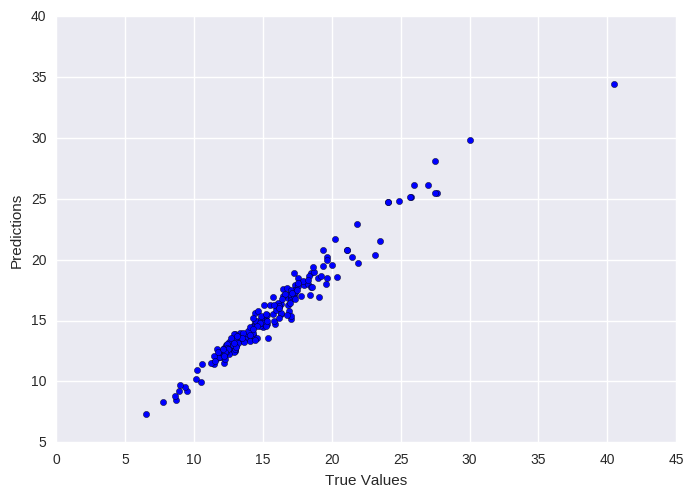

Model tested: adaboost
Best params: {'n_estimators': 100, 'loss': 'square', 'learning_rate': 1}
Train Score: 0.935337424117
Test Score: 0.900922648022


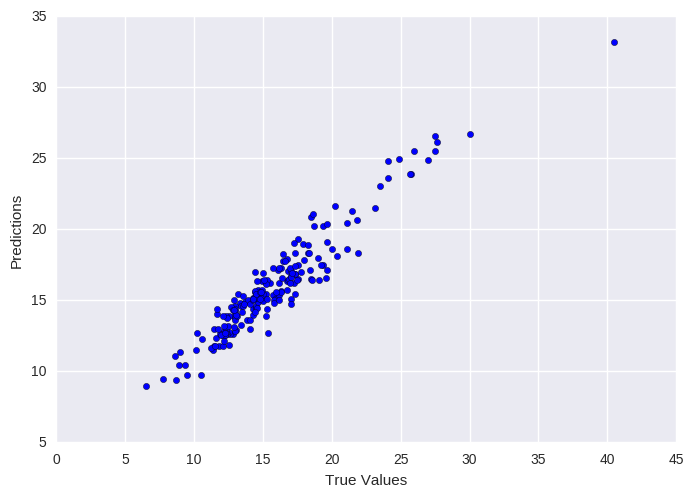

Model tested: random_forest
Best params: {'max_features': 0.75, 'n_estimators': 1000, 'bootstrap': True, 'max_depth': None}
Train Score: 0.994538954905
Test Score: 0.94458973365


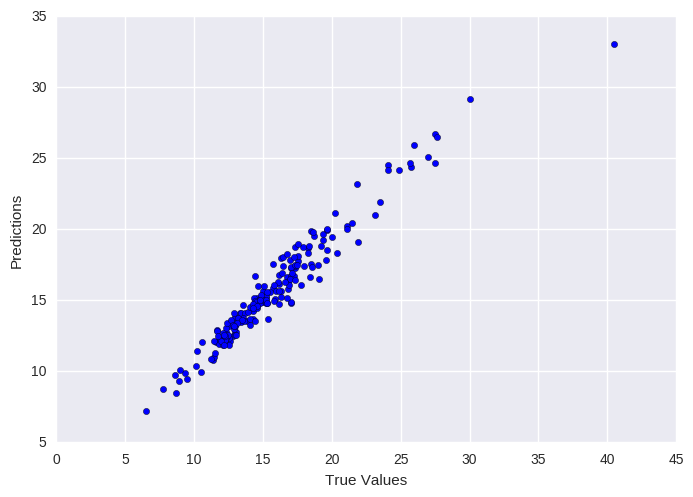

Model tested: bagging_decision_tree
Best params: {'max_features': 3, 'max_samples': 15, 'bootstrap': True}
Train Score: 0.356625297043
Test Score: 0.316016273628


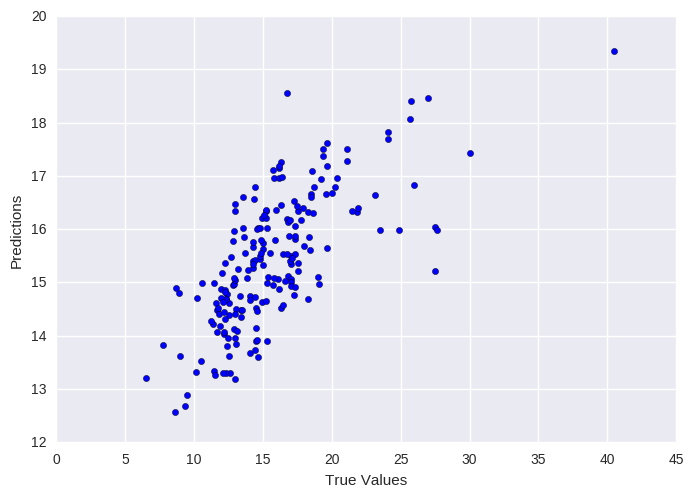

Model tested: extra_trees
Best params: {'max_features': 1.0, 'n_estimators': 100, 'bootstrap': False, 'max_depth': None}
Train Score: 1.0
Test Score: 0.948811616336


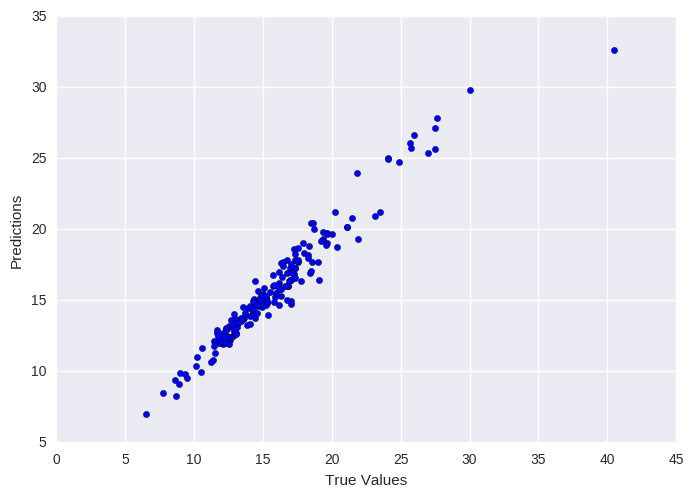

{'bagging_decision_tree': 0.31601627362847673, 'extra_trees': 0.94881161633599764, 'gradient_boosting': 0.96156076544879887, 'random_forest': 0.94458973365042509, 'adaboost': 0.90092264802235555}


In [74]:
# Get the best grid searched model of each type

results = {}

for key, value in models.items():
    counter = 0
    evaluate_model(X_train, X_test, y_train, y_test, value, key)
    
print results

Case Study: Chicago O'Hare

In [75]:
ohare = df[df['airport'] == 'ORD']
ohare = ohare.reset_index().drop('index', axis=1)
print ohare.shape
ohare

(11, 31)


airport  year  departures for metric computation  \
0      ORD  2004                             485187   
1      ORD  2005                             473216   
2      ORD  2006                             466079   
3      ORD  2007                             455562   
4      ORD  2008                             431539   
5      ORD  2009                             404978   
6      ORD  2010                             430948   
7      ORD  2011                             429476   
8      ORD  2012                             427374   
9      ORD  2013                             425352   
10     ORD  2014                             430429   

    arrivals for metric computation  percent on-time gate departures  \
0                            484859                           0.7179   
1                            474168                           0.7242   
2                            467039                           0.7036   
3                            455118                           0.6854   
4                            431421                           0.7049   
5                            404952                           0.7916   
6                            430618                           0.7803   
7                            428779                           0.7605   
8                            427768                           0.7707   
9                            428767                           0.7094   
10                           430750                           0.6787   

    percent on-time airport departures  percent on-time gate arrivals  \
0                               0.5739                         0.7210   
1                               0.6108                         0.7672   
2                               0.5881                         0.7100   
3                               0.5769                         0.6909   
4                               0.6115                         0.7062   
5                               0.7251                         0.8063   
6                               0.7090                         0.7938   
7                               0.6827                         0.7772   
8                               0.6981                         0.8069   
9                               0.6275                         0.7521   
10                              0.5784                         0.7050   

    average_gate_departure_delay  average_taxi_out_time  \
0                          17.79                  20.23   
1                          16.76                  19.03   
2                          19.66                  19.33   
3                          20.81                  19.02   
4                          19.94                  18.67   
5                          13.25                  16.78   
6                          14.09                  16.26   
7                          15.61                  16.55   
8                          14.45                  16.06   
9                          18.64                  16.60   
10                         20.21                  17.50   

    average taxi out delay  average airport departure delay  \
0                     9.36                            25.86   
1                     7.45                            23.14   
2                     7.75                            26.29   
3                     7.63                            27.34   
4                     7.04                            25.98   
5                     5.13                            17.31   
6                     5.05                            18.26   
7                     5.60                            20.20   
8                     4.97                            18.50   
9                     5.46                            23.49   
10                    6.17                            25.88   

    average airborne delay  average taxi in delay  average block delay  \
0                     3.19                   3.34           

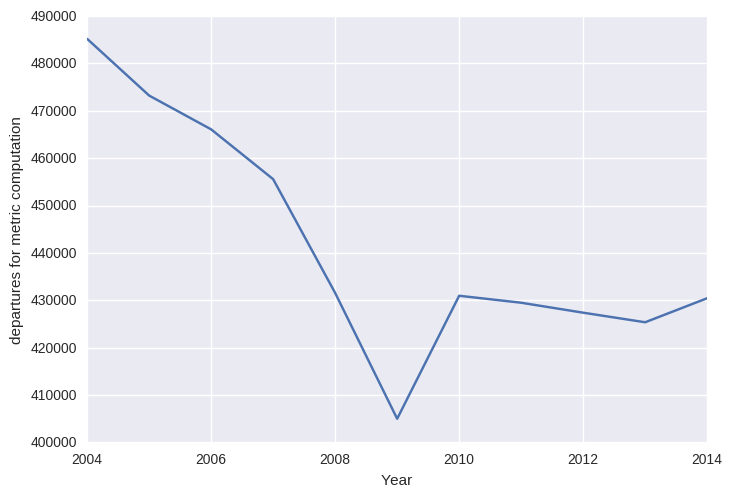

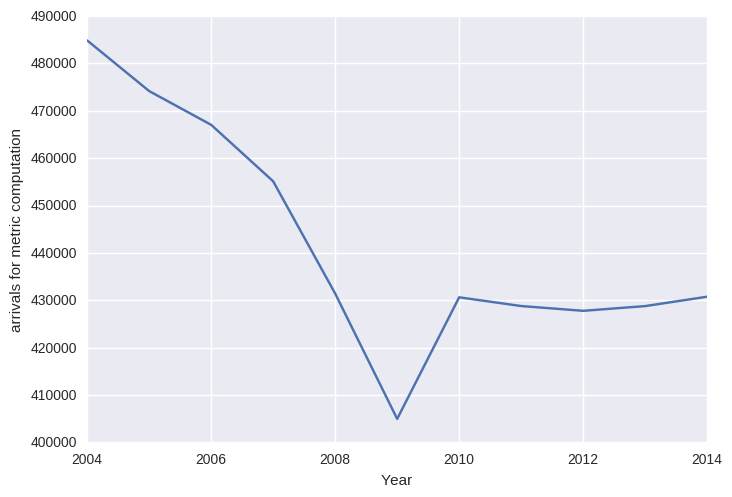

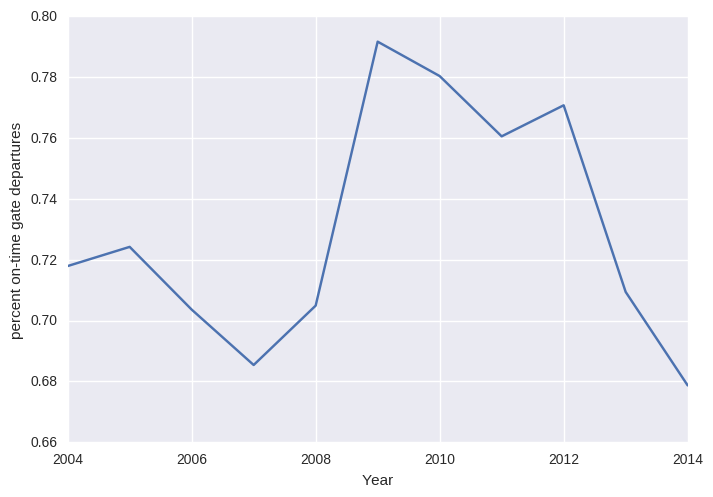

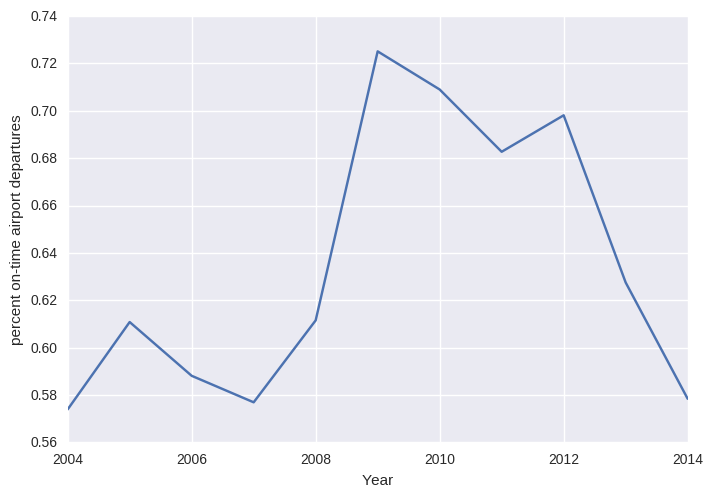

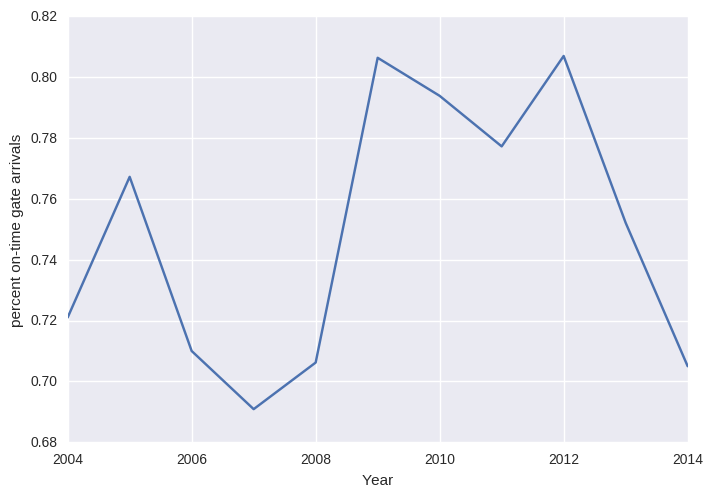

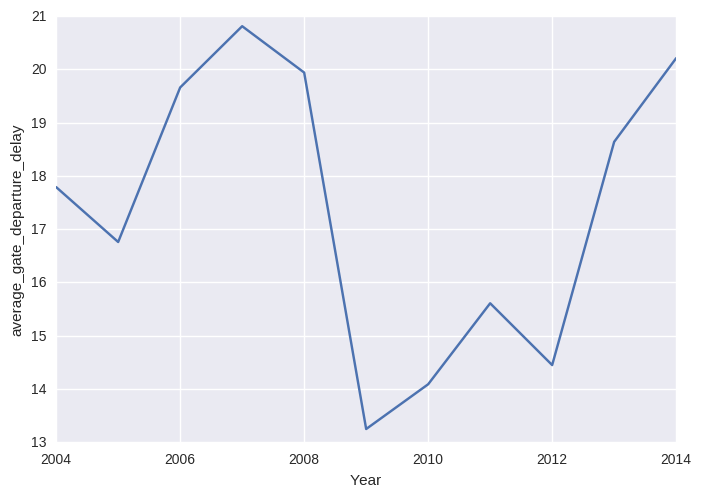

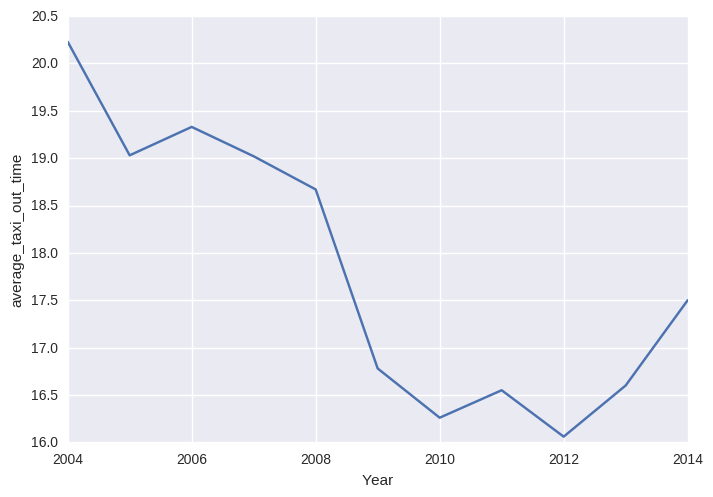

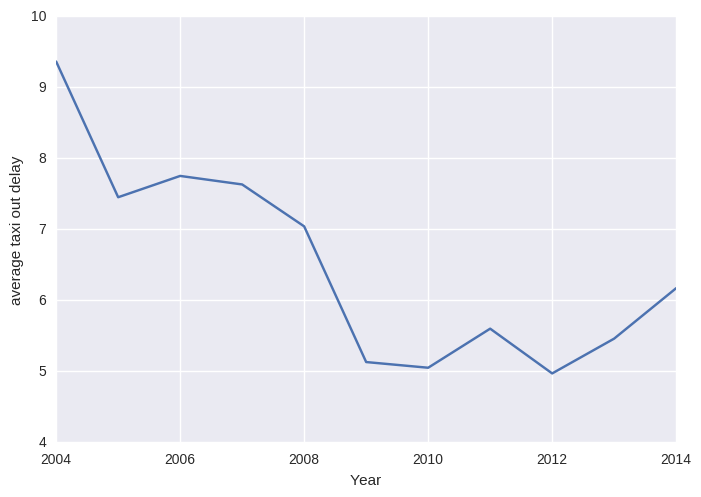

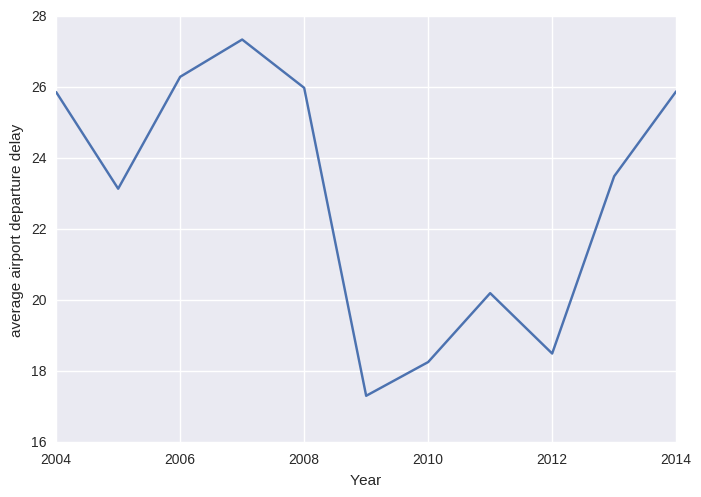

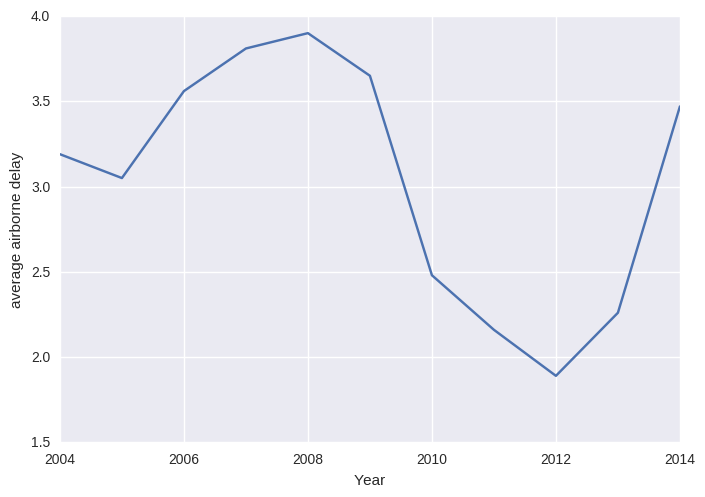

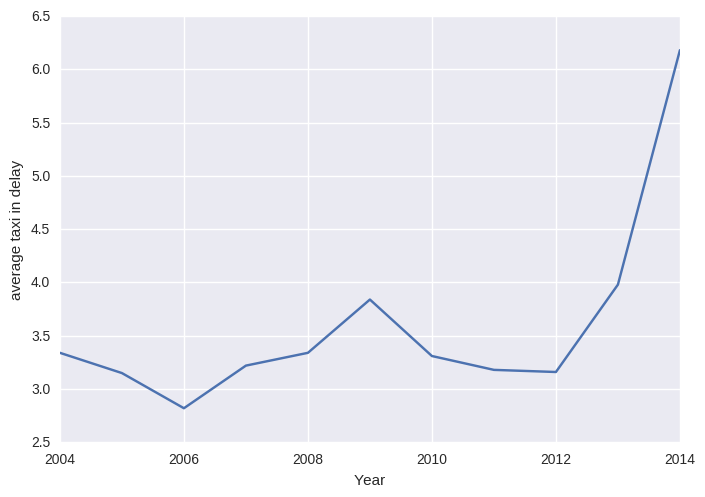

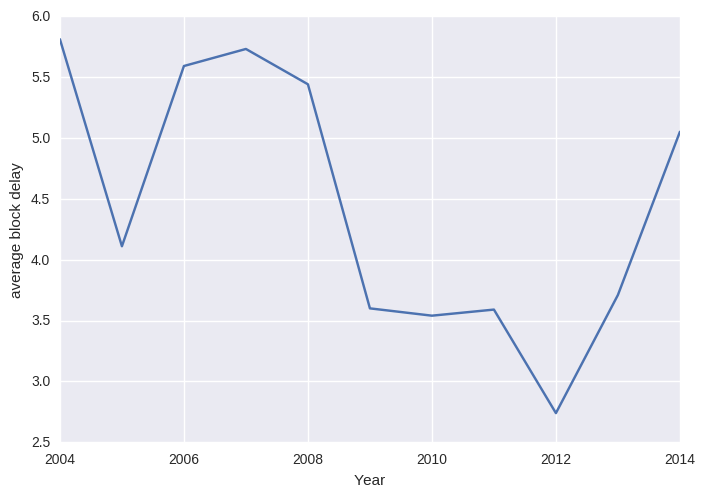

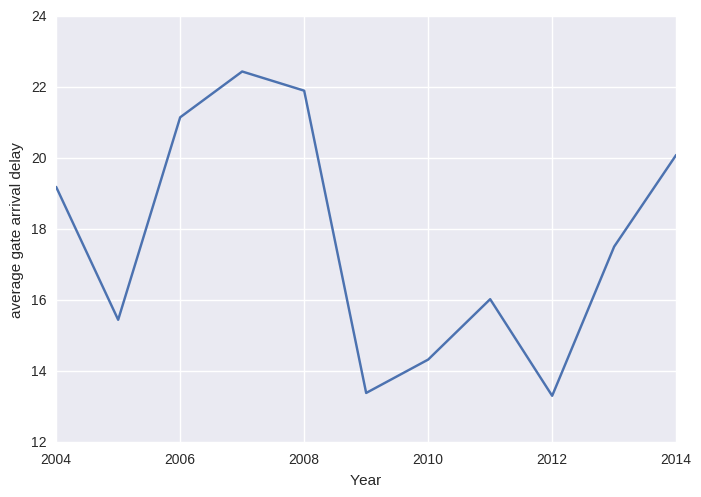

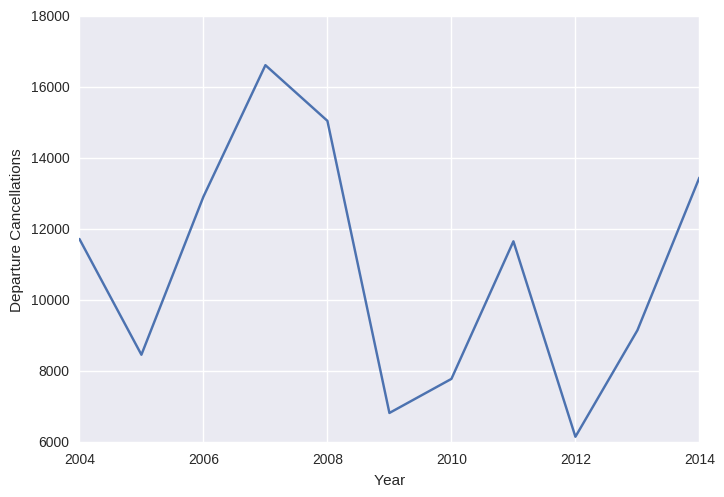

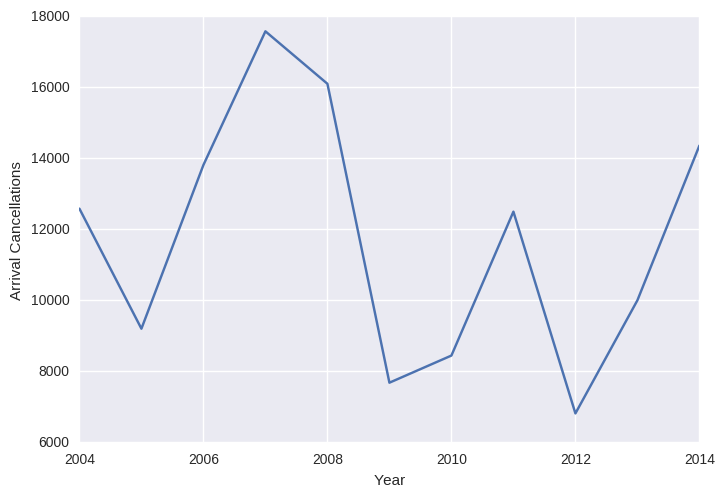

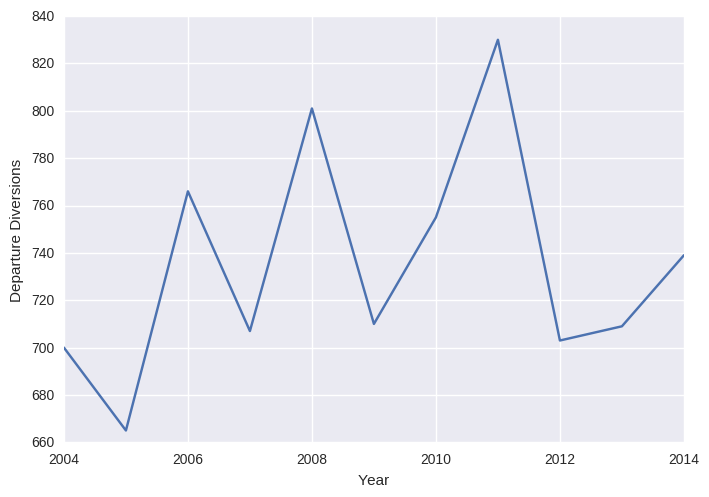

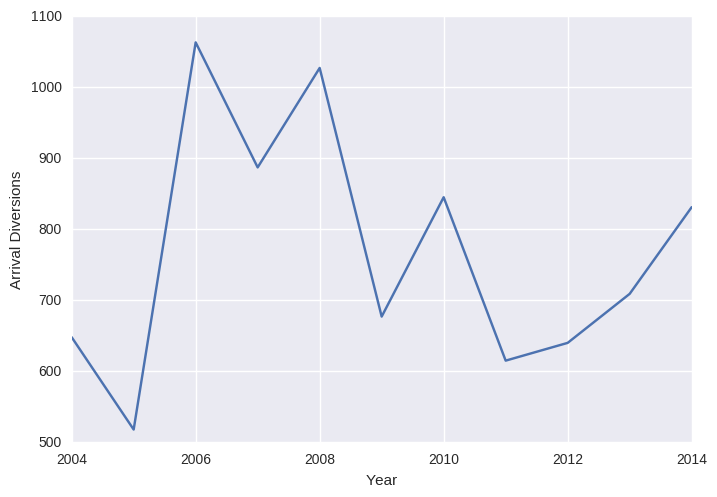

In [76]:
for col in num_cols[2:-2]: # excluding airport, year, longitude, and latitude
    plt.plot(ohare['year'], ohare[col])
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

#### 4.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

The data for this project consist of airport operations, cancellations, and details for 74 airports from the years 2004 to 2014. The data include details about the number, rate, and length of various types of airport delays, as well as some information about the location and basic operations of the specific airports. In addition to the airport operation and cancellation data included in the datasets, I included the FAA region and state the airport was located in, the airport type, and the specific airport itself in my set of components.

I used primary component analysis to reduce the number of components in the dataset. I chose enough components to include 90% of the explained variance in the dataset. I then used the reduced number of components to create a model that can predict the 'average airport departure delay'. A gradient boosting tree model was able to predict the average airport departure delay most accurately, with a score of over 0.95. 

The primary component analysis I did shows that the other information about delays included in the dataset were the most predictive of the final, total airport departure delay. For example, a higher average arrival delay was likely to lead to a higher airport departure delay, likely because a late arrival puts the plane behind schedule for its next flight. 

I also looked at Chicago O'Hare International Airport separately. The amount and length of delays varied widely over the 11 year period, with a late spike in delay length toward the end of the period.

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied